# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Regression problems

In general, we talk about __regression__ referring to several statistical methods to search for relationships among variables. 
Commonly speaking, __regression__ is the procedure allowing us to predict a _continuous_ variable out of a set of features.

### Linear regression

We have already encountered the problem of building a _regressor_ model and we have seen how to do such a construction both in the case of _kNN regressor_ than in the _linear model_ one.

Here, we revise the linear regression as a starting point for more complex cases.

<p align="center">
    <img width="600" alt="image" src="https://user-images.githubusercontent.com/49638680/159125919-9b7e2143-9670-48ed-bbc9-9f6c811290ef.png">
</p>

We have seen how [linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach to determine relationship between two or more quantities.
Let's proceed with a different example. We want to study the relation between House price (the target variable), number of bedrooms and size in feet squared.

#### Import libraries and data 

Let’s import necessary libraries, then we import the data into a Pandas dataframe called (with a lack of imagination) `data`. There are $3$ columns in the data set, `Size`, `Bedrooms`, and `Price`.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy.io as sio

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

In [2]:
# Import data
data = pd.read_csv('datasets/data.txt', names=["Size", "Bedrooms", "Price"])

In [3]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Note how this is somehow different with respect to the last linear regression example: it is _multivariate_, that is there is more than one feature.

Do not let this scare us! It can be treated in the very same way:

Recall that in the case of a linear regression, we look for a _linear_ law of the form,

$$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots \beta_m x_m\, . $$

Where we denote the _feature vector_ as $\mathbb{x} = (x_1 \ldots x_m )$. 
In our example, the number of features $m = 2$.

As usual, $h_\beta(x)$ is our prediction for the dependent variable $y$.

Determining the value of $\beta$'s is the aim of a machine learning _fit_ procedure.

Also in this case, a convenient way to write down the hypothesis is to make use of linear algebra. 

In order to do so, we need to reshape our data as a matrix $X$, as made of $n$ rows of feature vectors.

Hence,

$$ X = \begin{pmatrix} 1      & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_m \\
                       1      & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_m \\
                       \ldots & \ldots    & \ldots    & \ldots & \dots     \\ 
                       1      & x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_m \end{pmatrix} $$
                       
and

$$ h_\beta(x) = X \cdot \beta = \begin{pmatrix} 1      & x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_m \\
                       1      & x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_m \\
                       \ldots & \ldots    & \ldots    & \ldots & \dots     \\ 
                       1      & x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_m \end{pmatrix} 
                                \begin{pmatrix} \beta_0 \\
                                                \beta_1 \\ 
                                                \ldots  \\
                                                \beta_m \end{pmatrix} \, . $$
                                                

In other words, we consider the intercept terms $\beta_0$ as co-factors of $x^0 \equiv 1$.

In our specific case,

$$ h_\beta(x) = X \cdot \beta = \begin{pmatrix} 1      & x^{(1)}_1 & x^{(1)}_2 \\
                       1      & x^{(2)}_1 & x^{(2)}_2 \\
                       \ldots & \ldots    & \ldots    \\ 
                       1      & x^{(n)}_1 & x^{(n)}_2 \end{pmatrix} 
                                \begin{pmatrix} \beta_0 \\
                                                \beta_1 \\ 
                                                \beta_2 \end{pmatrix} \, . $$

### Feature scaling

Looking at the values in the table above, we see that house sizes are about $1000$ times the number of bedrooms. 
When features differ by such orders of magnitude, we have seen how feature scaling becomes really important as it helps the gradient descent algorithm to converge faster.

We will use the `sklearn` `StandardScaler` to _rescale_ our features. 



In [4]:
def feature_normalise(X, params = None):
    """
    This function takes the features as input and
    returns the normalised values, the mean, as well 
    as the standard deviation for each feature.
    """
    if params is None:
        X_norm = (X - np.mean(X))/np.std(X) ## Scaling function.
        mu = np.mean(X) ## Define the mean
        sigma = np.std(X) ## Define the standard deviation.
    else:
        mu = params['mu'], 
        sigma = params["sigma"]
        X_norm = (X - mu)/sigma

    return X_norm, mu, sigma ## return the values.


Hence, we assign variables, $x$ is the feature matrix, $y$ the target vector.

In [5]:
x = data.drop(["Price"], axis=1).values
y = data["Price"].values

# Normalise
x, mu, sigma = feature_normalise(x)

In the next step, we append the bias term (field containing all ones) to the features $x$. We also reshape the target variable $y$ to a $n \times 1$ vector, and initialise the coefficients vector (`beta`) to all zeros.

In [6]:
X = np.ones((len(x), 3))
X[:,1:] = x

y = np.array(y).reshape(-1,1) ## reshape y to n x 1 array

beta = np.zeros([3,1]) ## Initialize beta (the coefficient) to a $1 x 3$ zero vector.

#### A 3D plot

Here we are going to define a 3D plot of our data.

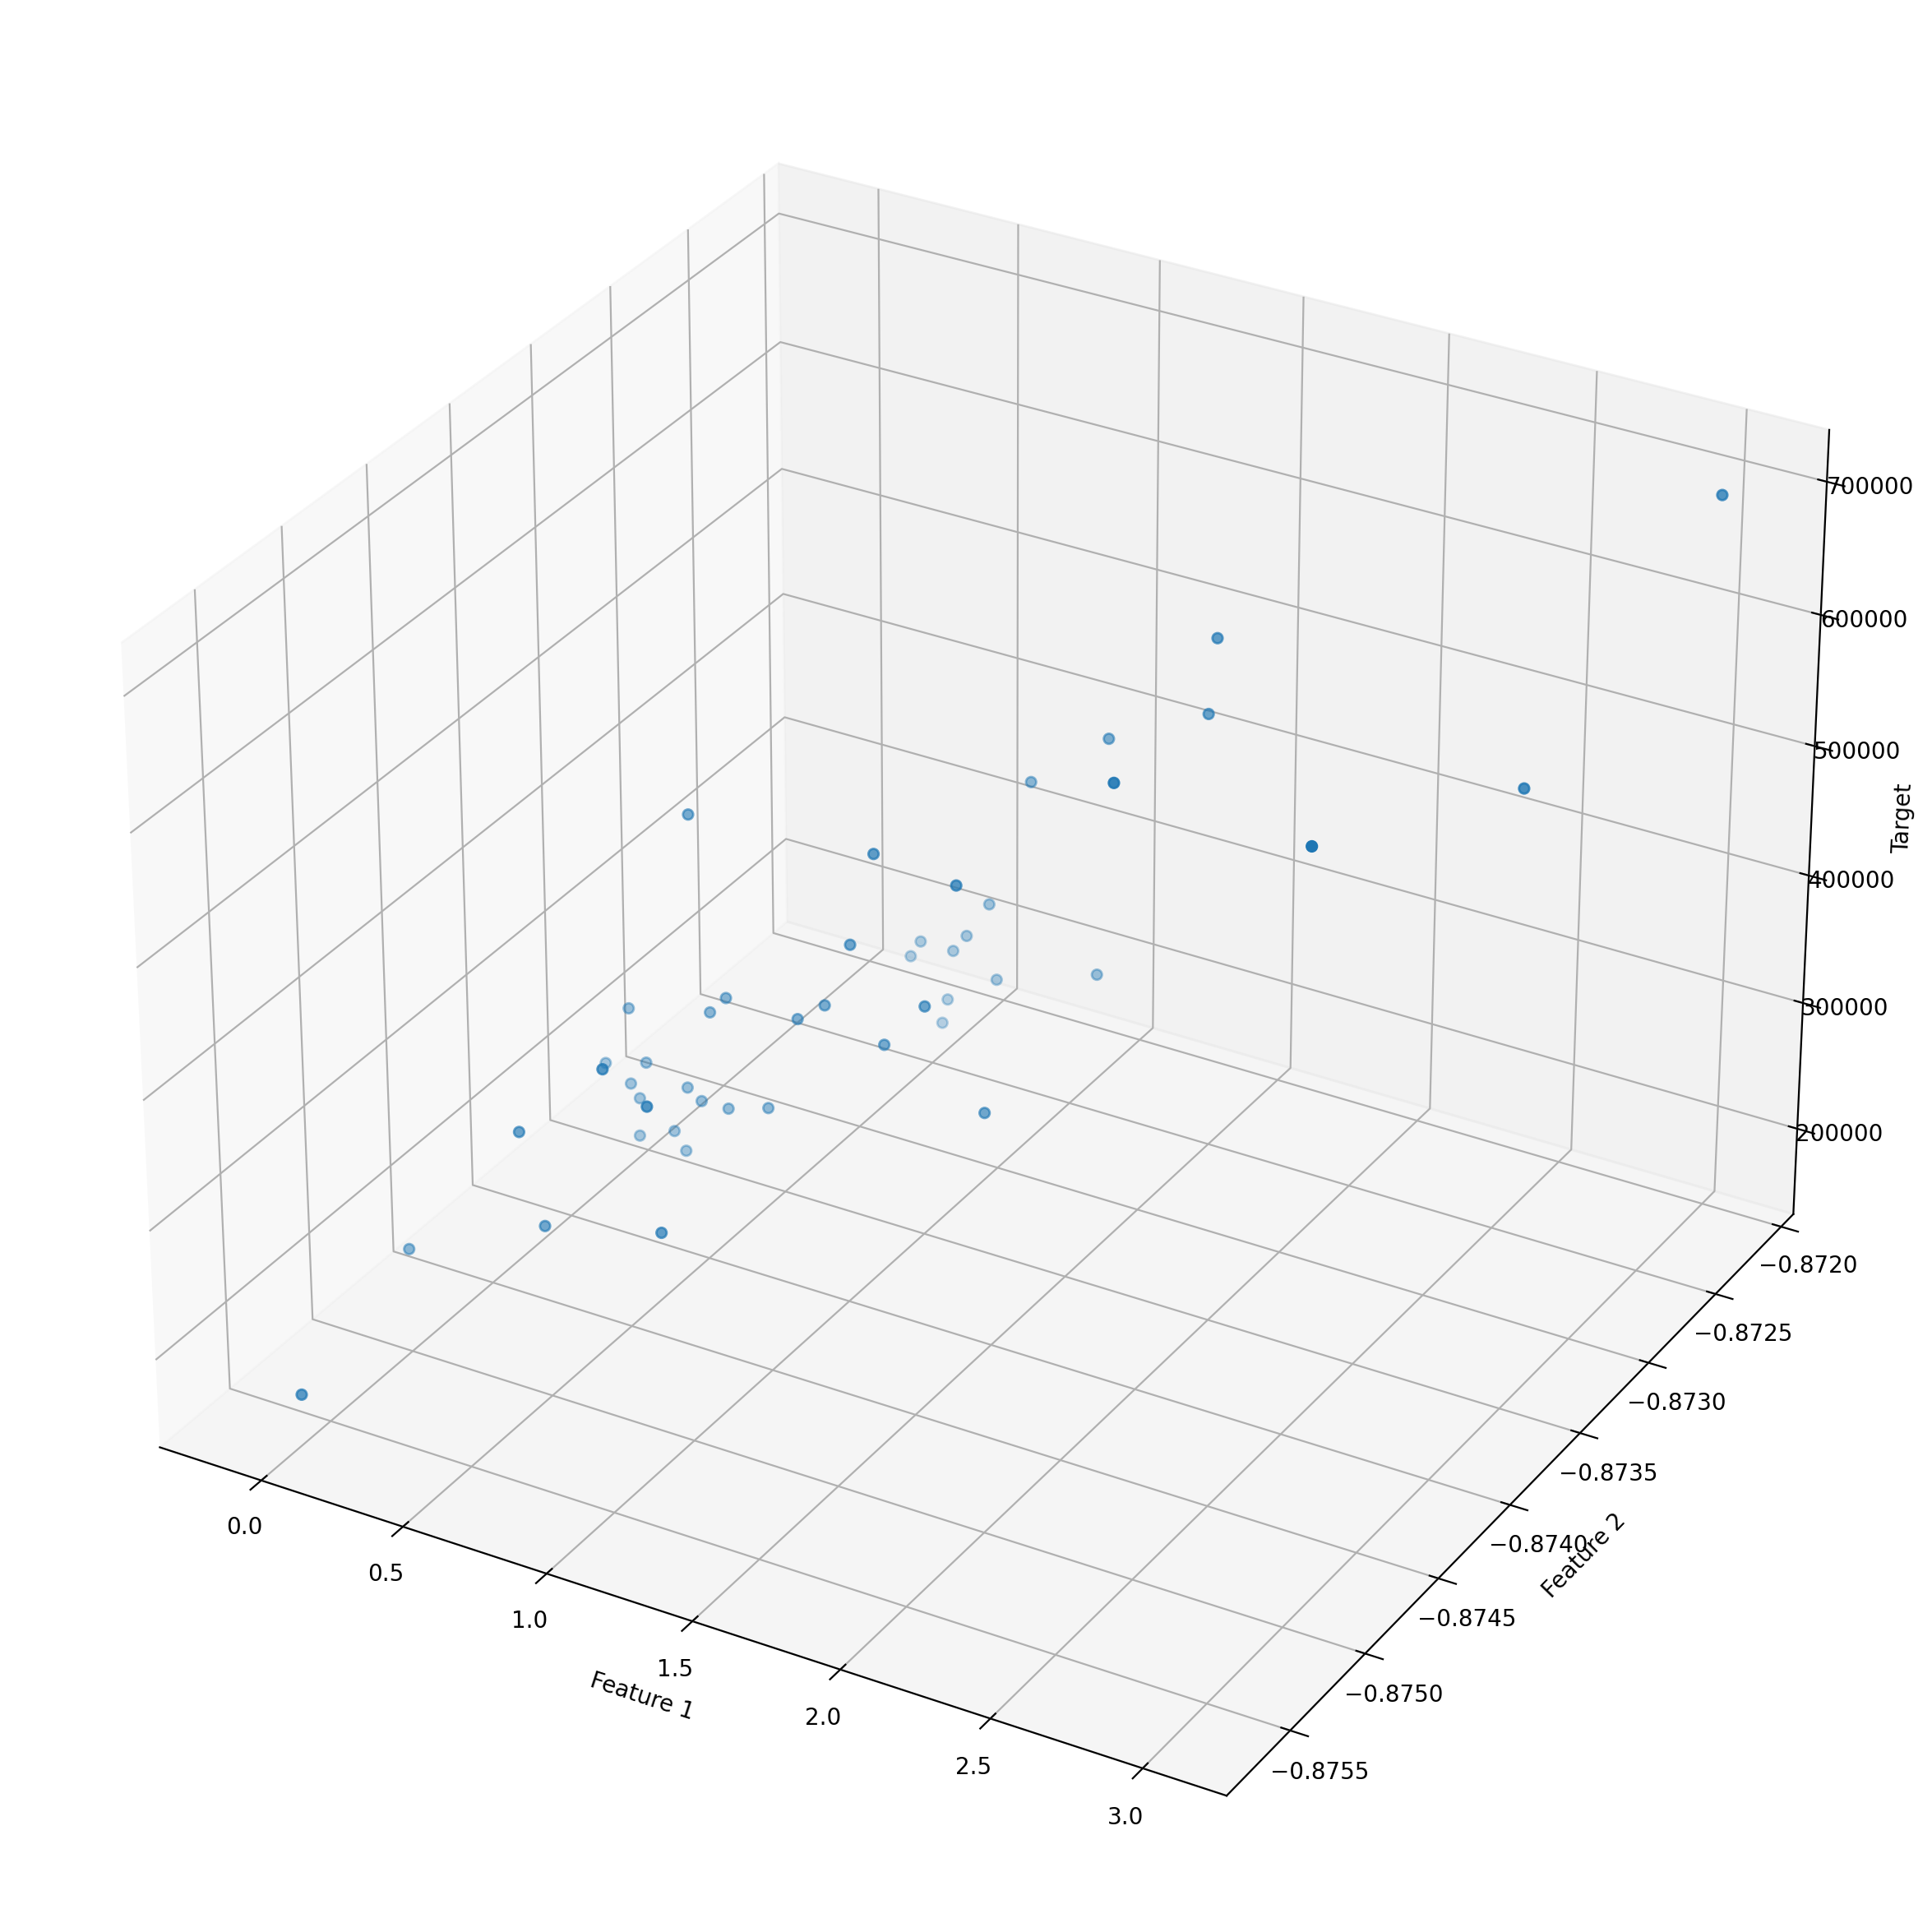

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.show()

#### Cost function

We have already seen the cost function for linear regression, it is typically the `mse`, _Mean Squared Error_, that is

$$J(\beta) := \frac{1}{2n} \sum_i \left(h_\beta(x^{(i)}) - y^{(i)} \right)^2 \, .$$

We also have implemented that in python, let's revise such implementation.

In [8]:
def compute_cost(X, y, beta):
    """
        (array of float, array of float, array of float) -> float
        
        :return: the value of squared-difference cost function.
    """
    n = len(y)
    cost = np.dot((np.dot(X,beta) - y).T, (np.dot(X,beta) - y))/(2*n) 
    return cost

Note that since the function is well written, with no explicit sum nor for loop, we do not need to modify anything. Our function will take multidimensional inputs with no need of further coding.

Let's call the cost function on the initial values of parameters, _i.e._ $\beta = 0$.

In [9]:
compute_cost(X, y, beta)

array([[6.55915481e+10]])

#### Gradient Descent

We are going to minimise our cost function by updating parameters by gradient descent.

$$ \beta_j = \beta_j -\alpha \frac{1}{n}\sum_i \left(h_\beta(x^{(i)}) - y^{(i)} \right) x^{(i)}_j\, .$$

We have already implemented Gradient Descent, here we only stress the fact that we need no edit to the previous code.

In [10]:
# Gradient descent algorithm
def gradientDescent(X, y, beta, alpha, max_iterations, cost_thr = 1e-5):
    """
        (array of float, array of float, array of float, float, int, [float]) -> array of float, array of float, float, int
        
        :return: the following tuple:
            - array of parameters beta
            - array of beta for each step
            - cost function
            - number of iterations
    """
    
    n = len(y)
    # cost = np.zeros(max_iterations)
    cost = []
    betaMod = beta.copy()
    # betaHist = np.zeros(max_iterations)
    beta0Hist = []
    beta1Hist = []
    
    for i in range(max_iterations):                                             
        betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n 
        beta0Hist.append(betaMod[0])
        beta1Hist.append(betaMod[1])        
        # cost[i] = compute_cost(X, y, betaMod)
        cost.append(compute_cost(X, y, betaMod))
        # exit conditions
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    beta0Hist = np.array(beta0Hist)
    beta1Hist = np.array(beta1Hist)
    betaHist = [beta0Hist, beta1Hist]
    
    return betaMod, betaHist, cost, i

We need some optimisation parameters, _i.e._ learning rate and maximum number of iterations.

In [11]:
# parameters 
max_iterations = 1500 
alpha = 0.01 # learning rate

Let's train our algorithm.

In [12]:
betaFit, betaHist, cost, iterations = gradientDescent(X, y, beta, alpha, max_iterations);

In [13]:
print(cost[-1])

[[2.06112718e+09]]


The cost was ~$6.5 \times 10^{10}$. There has been a huge improvement.

Let's plot cost against number of iterations to see how the cost changed as the algorithm ran.

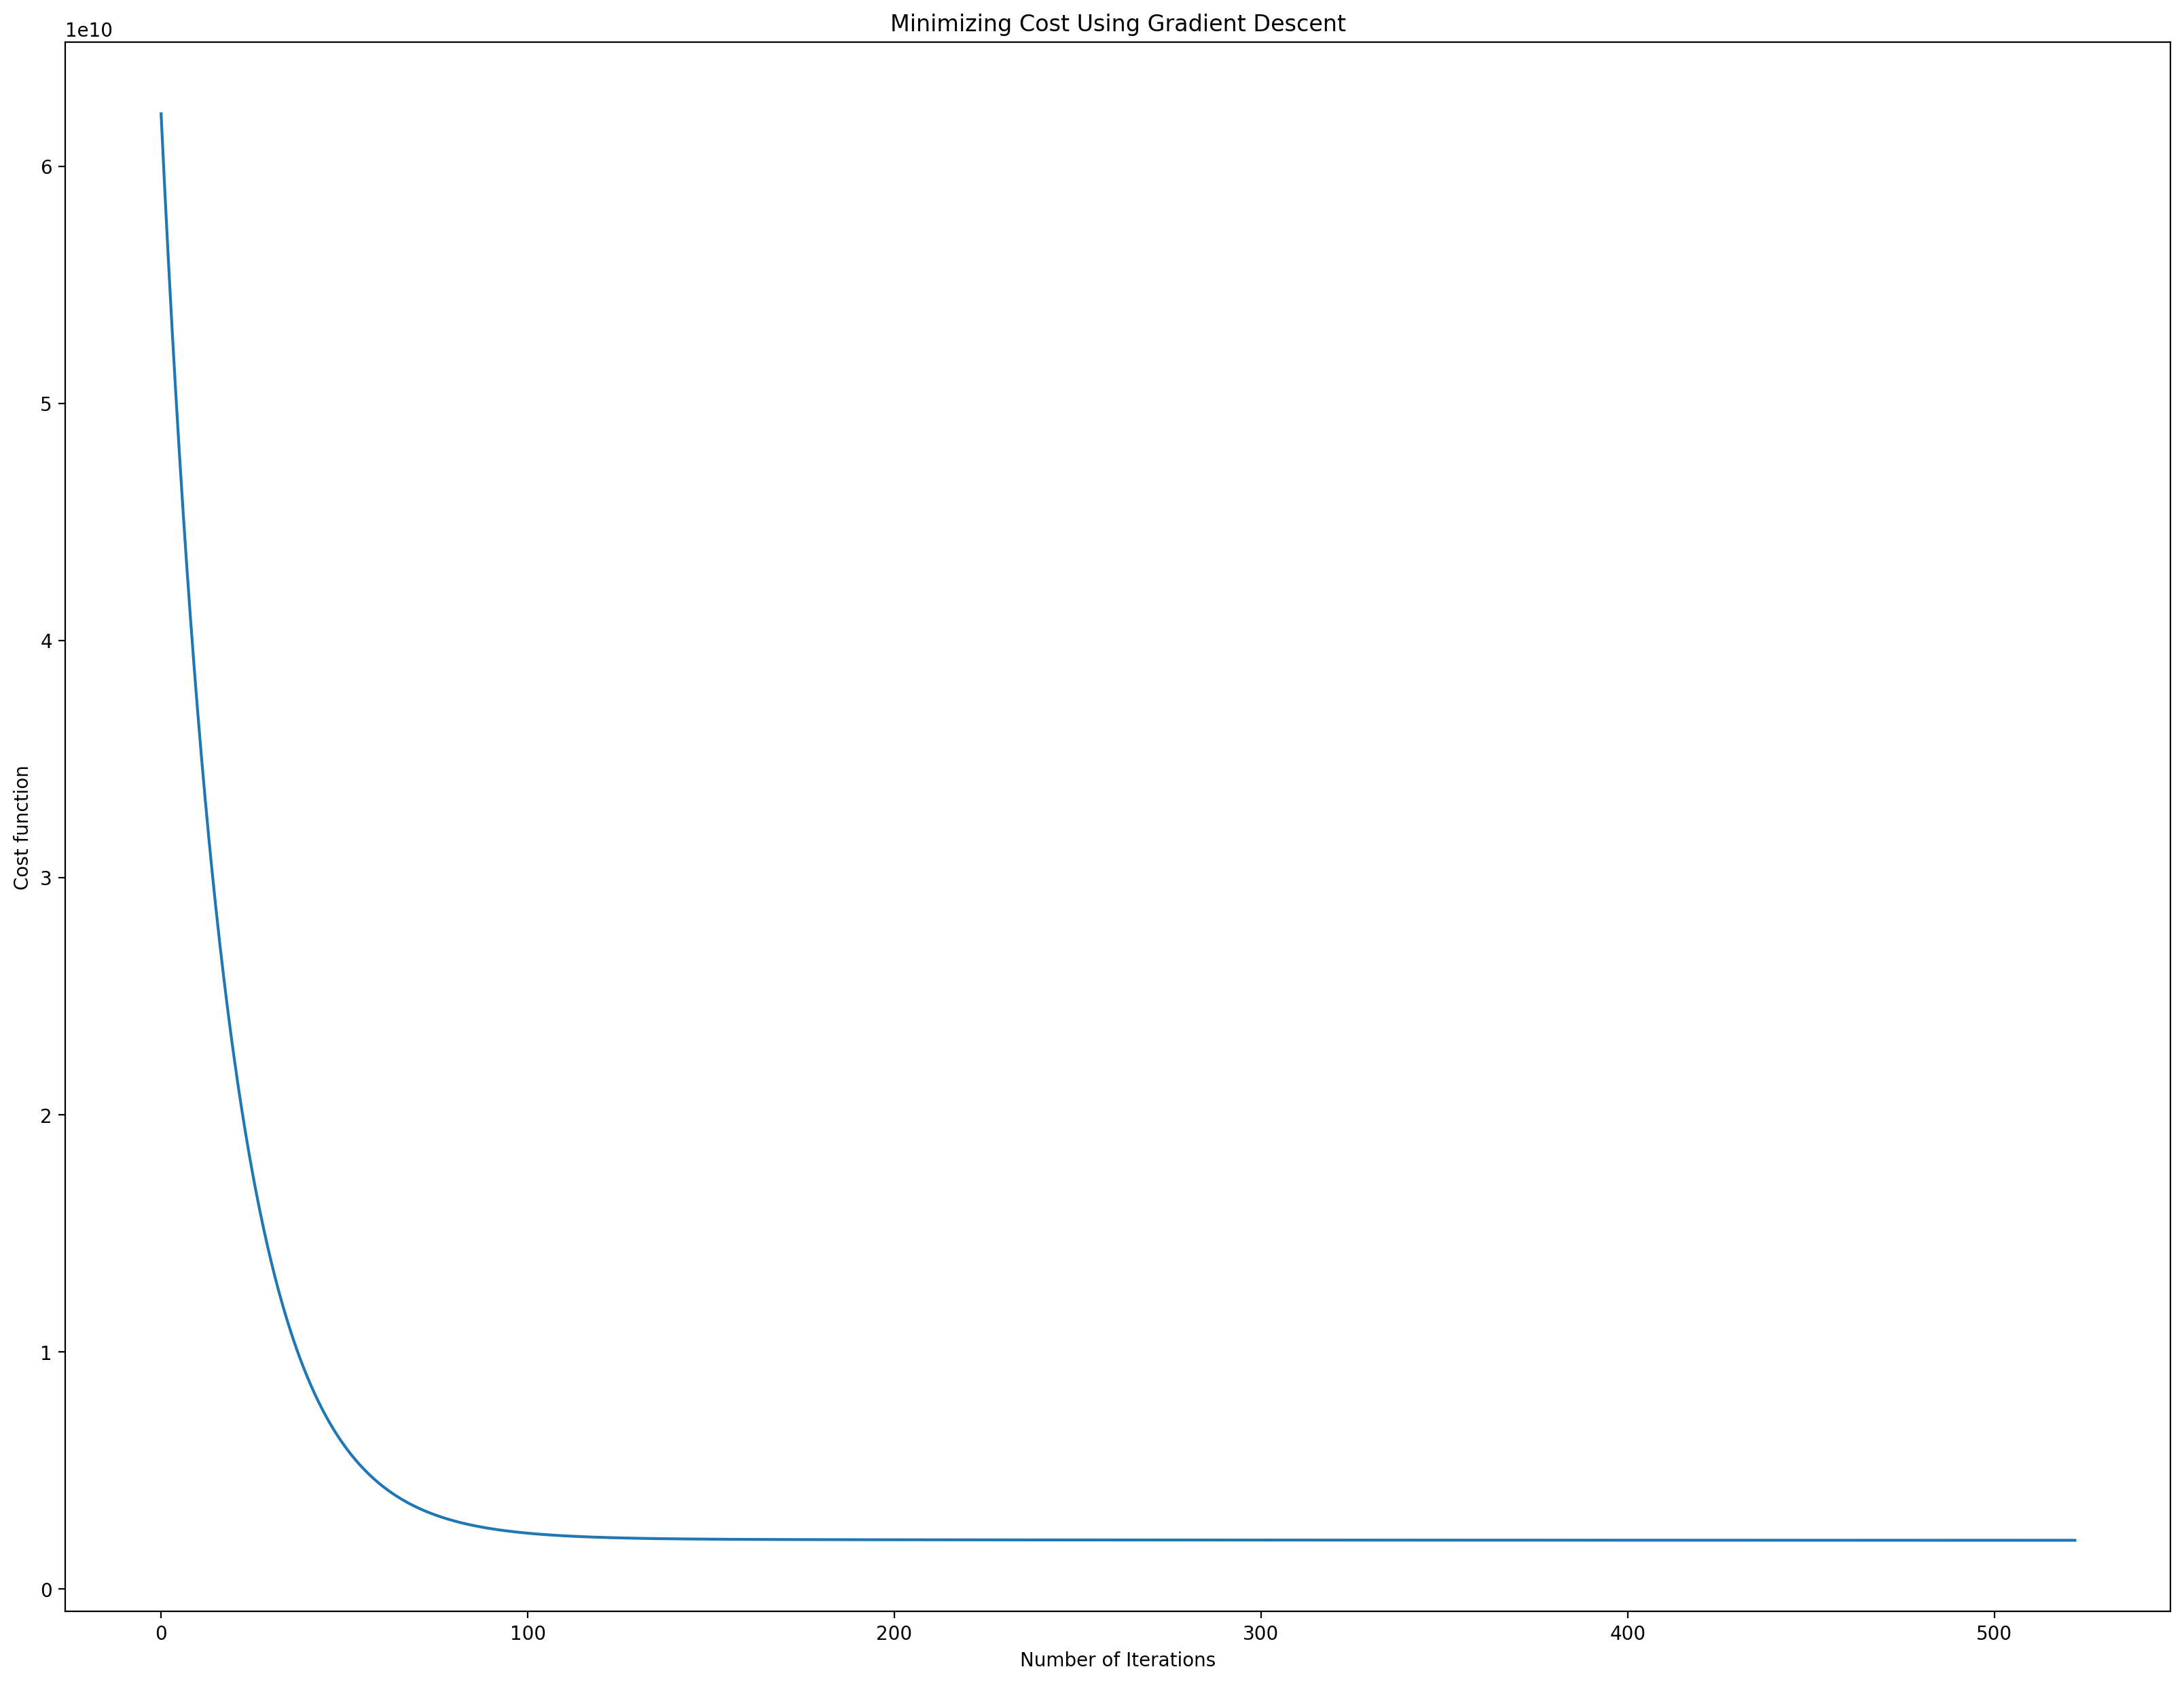

In [14]:
plt.figure(figsize=(20,15))
plt.plot(cost.reshape(-1))
plt.ylabel("Cost function")
plt.xlabel("Number of Iterations")
plt.title("Minimizing Cost Using Gradient Descent");

The graph shows that cost fell steadily until about the $200^{\mathrm{th}}$ iteration, then it kind of flattened out. This also proves the gradient descent algorithm performed well.

### Sklearn

We can actually do the same with a lot less effort, by using `sklearn`.

This is actually very simple, as we only need to be careful with matrices dimensions.

In [15]:
# Instantiate the model and train it.
model = LinearRegression()
model.fit(X, y);

Now we use a test house of $1650~\mathrm{ft}^2$ and $3$ bedrooms.

In [16]:
test_house = np.array([1650, 3])

rescaled_test_house, _ , _ = feature_normalise(test_house, params={"mu": mu, "sigma": sigma})
rescaled_test_house = np.append([1], rescaled_test_house)
pred = model.predict(rescaled_test_house.reshape(1, -1))

print('Your calculated prediction for a 3 bedroom / 1650 sqft house cost is: $%0.2f' % pred)

Your calculated prediction for a 3 bedroom / 1650 sqft house cost is: $293081.46


### Polynomial Regression

With such optic, we will see that polynomial regression is - from the code point of view - actually equivalent to a multivariate linear regression where the $k^\mathrm{th}$ feature is actually the $k^\mathrm{th}$ power of the feature variable.

Hence we are going to take $x^{(k)} = x^k$ and consider everything as a multivariate linear regression. Let's see this on an example.

The reasons to consider further than a simple linear relation between two quantities might be numerous. For instance, one may want to increase the modelling power of its algorithm by looking for something more complex than a linear fit. The simplest way to do so is to make use of [polynomials](https://en.wikipedia.org/wiki/Polynomial).

Here, we build an example. We want to study the trend of water level of a bathub as a function of the water falling off from a dam. We load data from a file and collect them into a known and loved pandas dataframe.

In [17]:
dataset = sio.loadmat('datasets/dataset.mat') # load a .mat file. Recall the function loadmat returns a dictionary

We can split into train and test.

In [18]:
# Give names to variables

X = dataset['X']
X_test = dataset['Xtest']
X_val = dataset['Xval']
y = dataset['y']
y_test = dataset['ytest']
y_val = dataset['yval']

For the moment being, let's focus on the pandas DataFrame containing the full dataset values stored in `X` and `y`.

In [19]:
measures = pd.DataFrame({'Change in water level' : X.flatten(), 'Water flowing out of the dam': y.flatten()})

In [20]:
measures = measures.sort_values(by = ['Change in water level']) 

__questions__: Why do we sort values? Is it strictly necessary?

Try to ignore the execution of the cell above, and see whether something changes.

Let's plot data, with trend polynomial of several degrees.

In [21]:
def plot_poly(x, y, xlabel, ylabel, max_degree = 10):
    """
        :return: plots of data in measures, with axis legends given by xlabel and ylabel, and polynomial trend curves
        from degree 0 to max_degree (default = 10).
    """
    for k in range(max_degree + 1):
        measures.plot(kind='scatter', x = xlabel, y = ylabel, color='blue', figsize=(17,10))
        z = np.polyfit(x, y, k)
        p = np.poly1d(z)
        plt.plot(x, p(x), "r--", label='polynomial of degree %s'%k)
        pst = plt.legend(loc='lower right', frameon=True)
        plt.show()

In [22]:
x = measures['Change in water level']
y = measures['Water flowing out of the dam']
xlabel = 'Change in water level'
ylabel = 'Water flowing out of the dam'

Call the function defined above to plot curve trends.

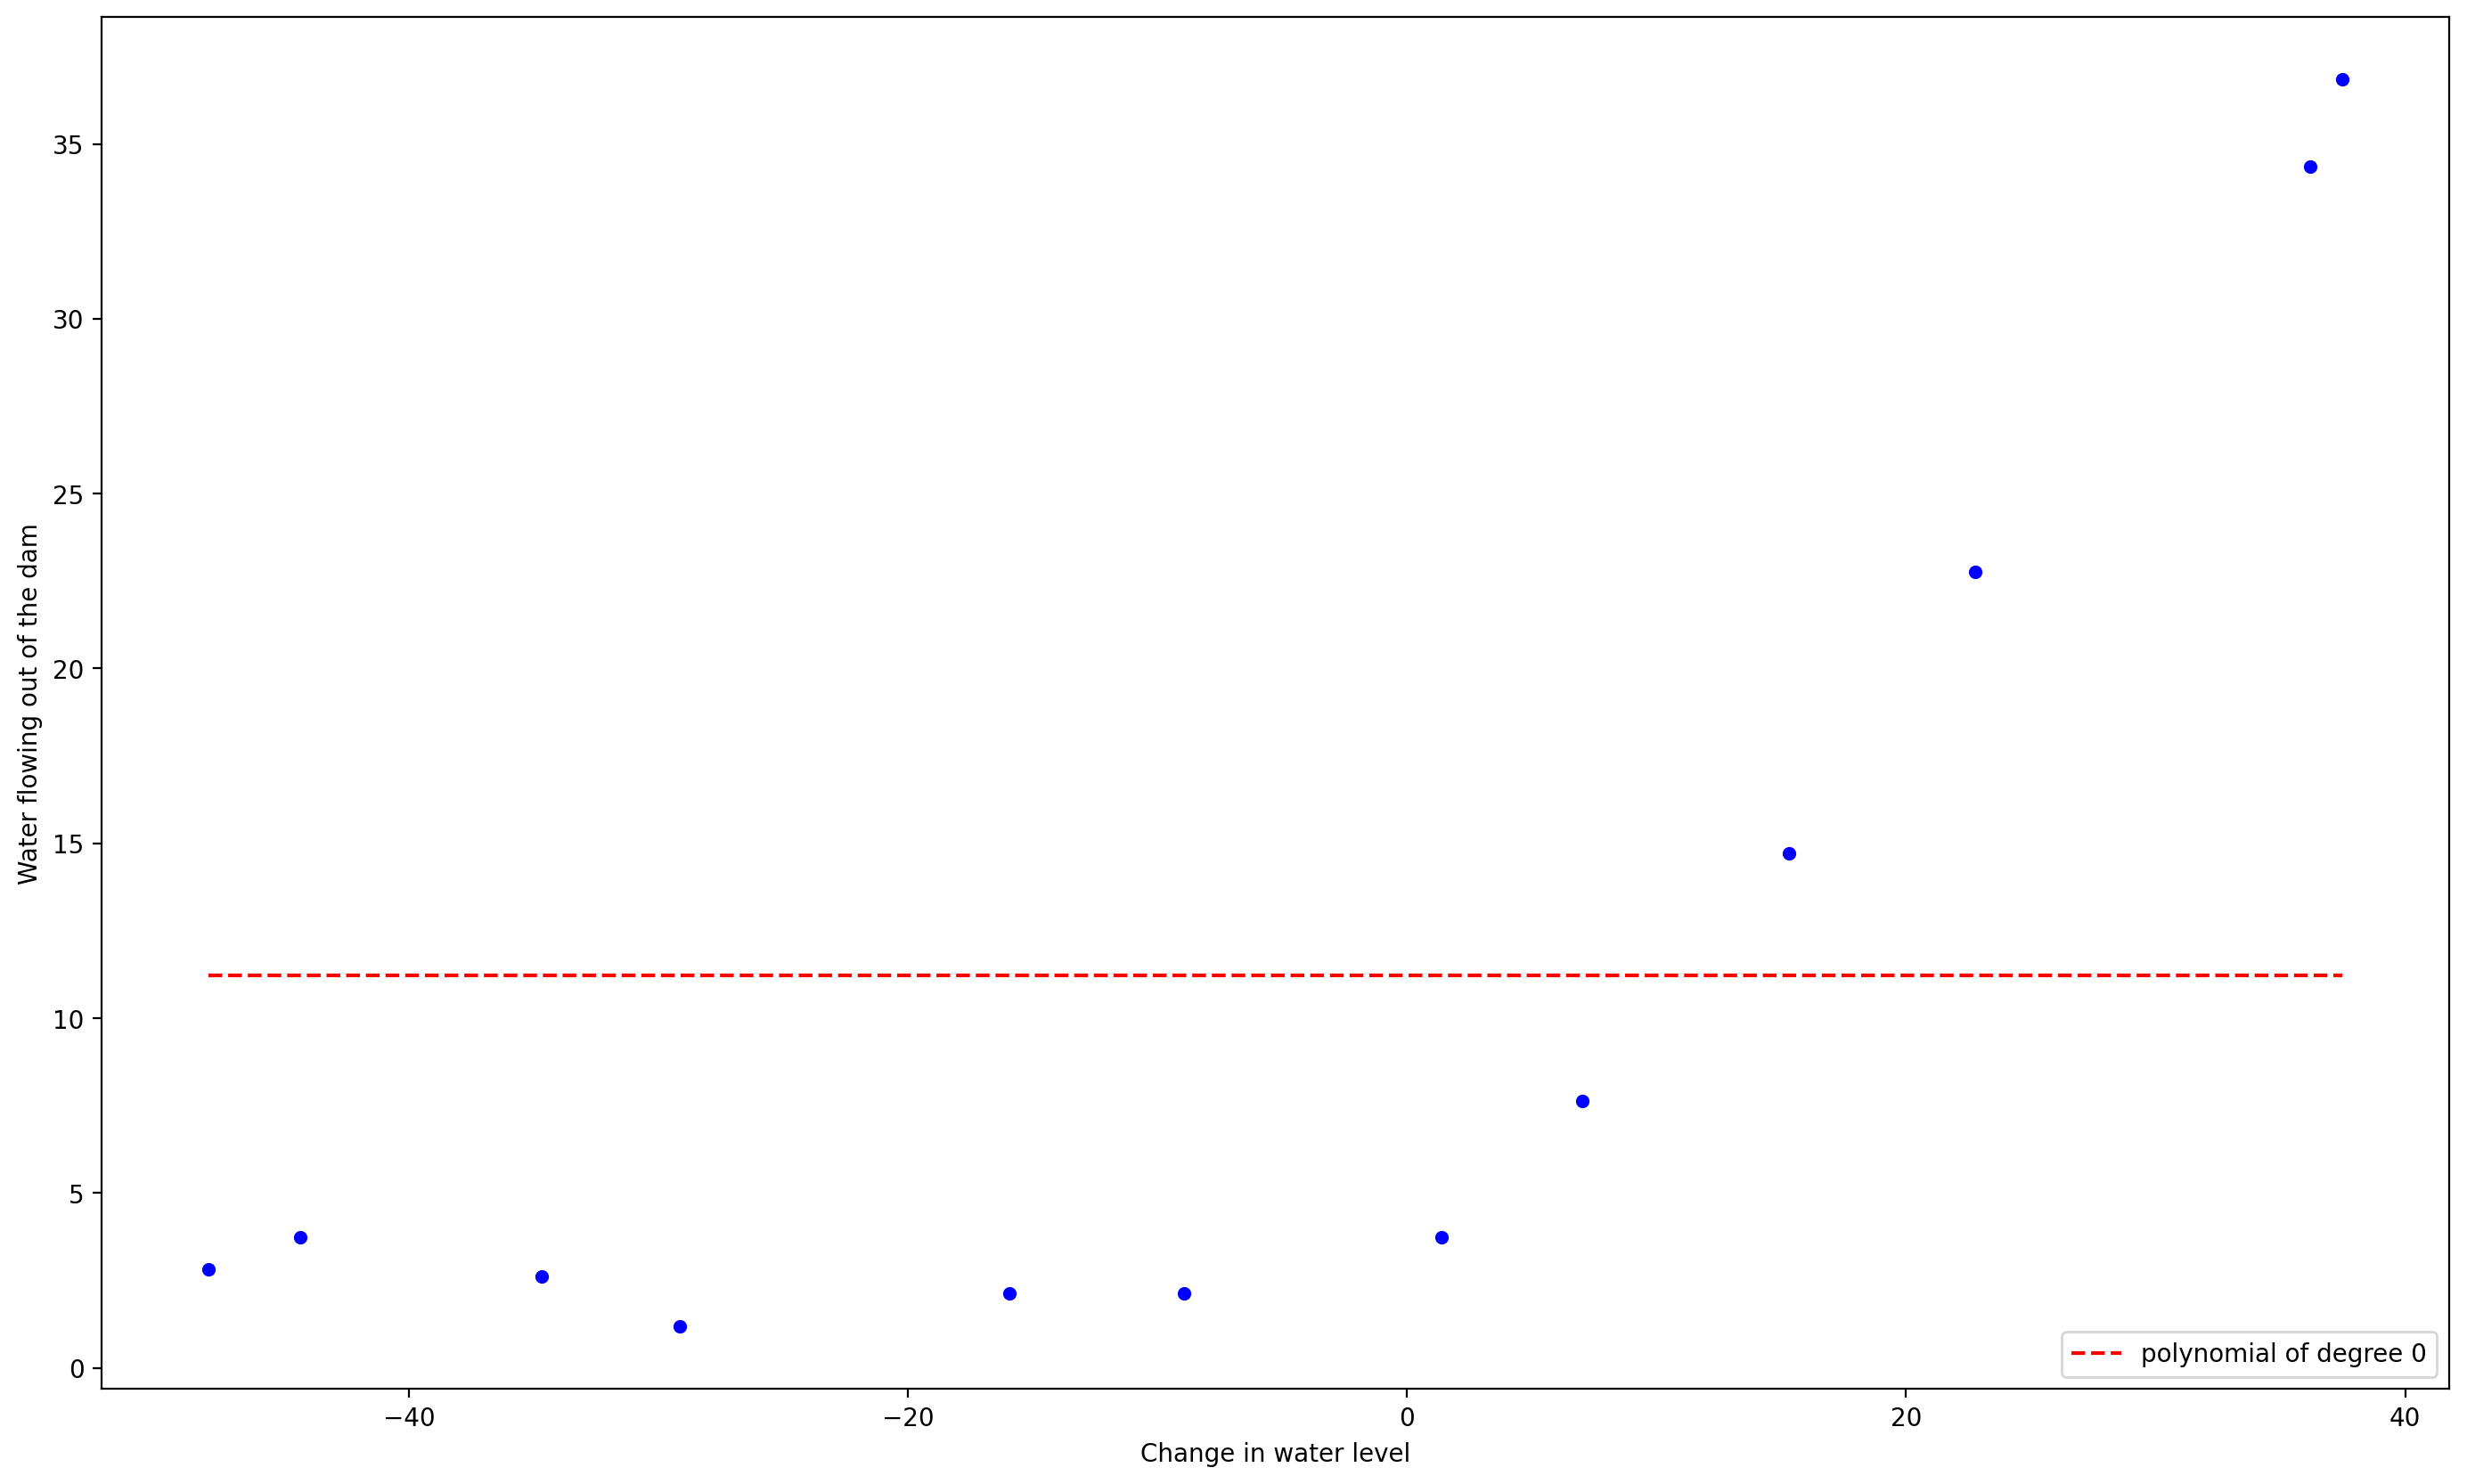

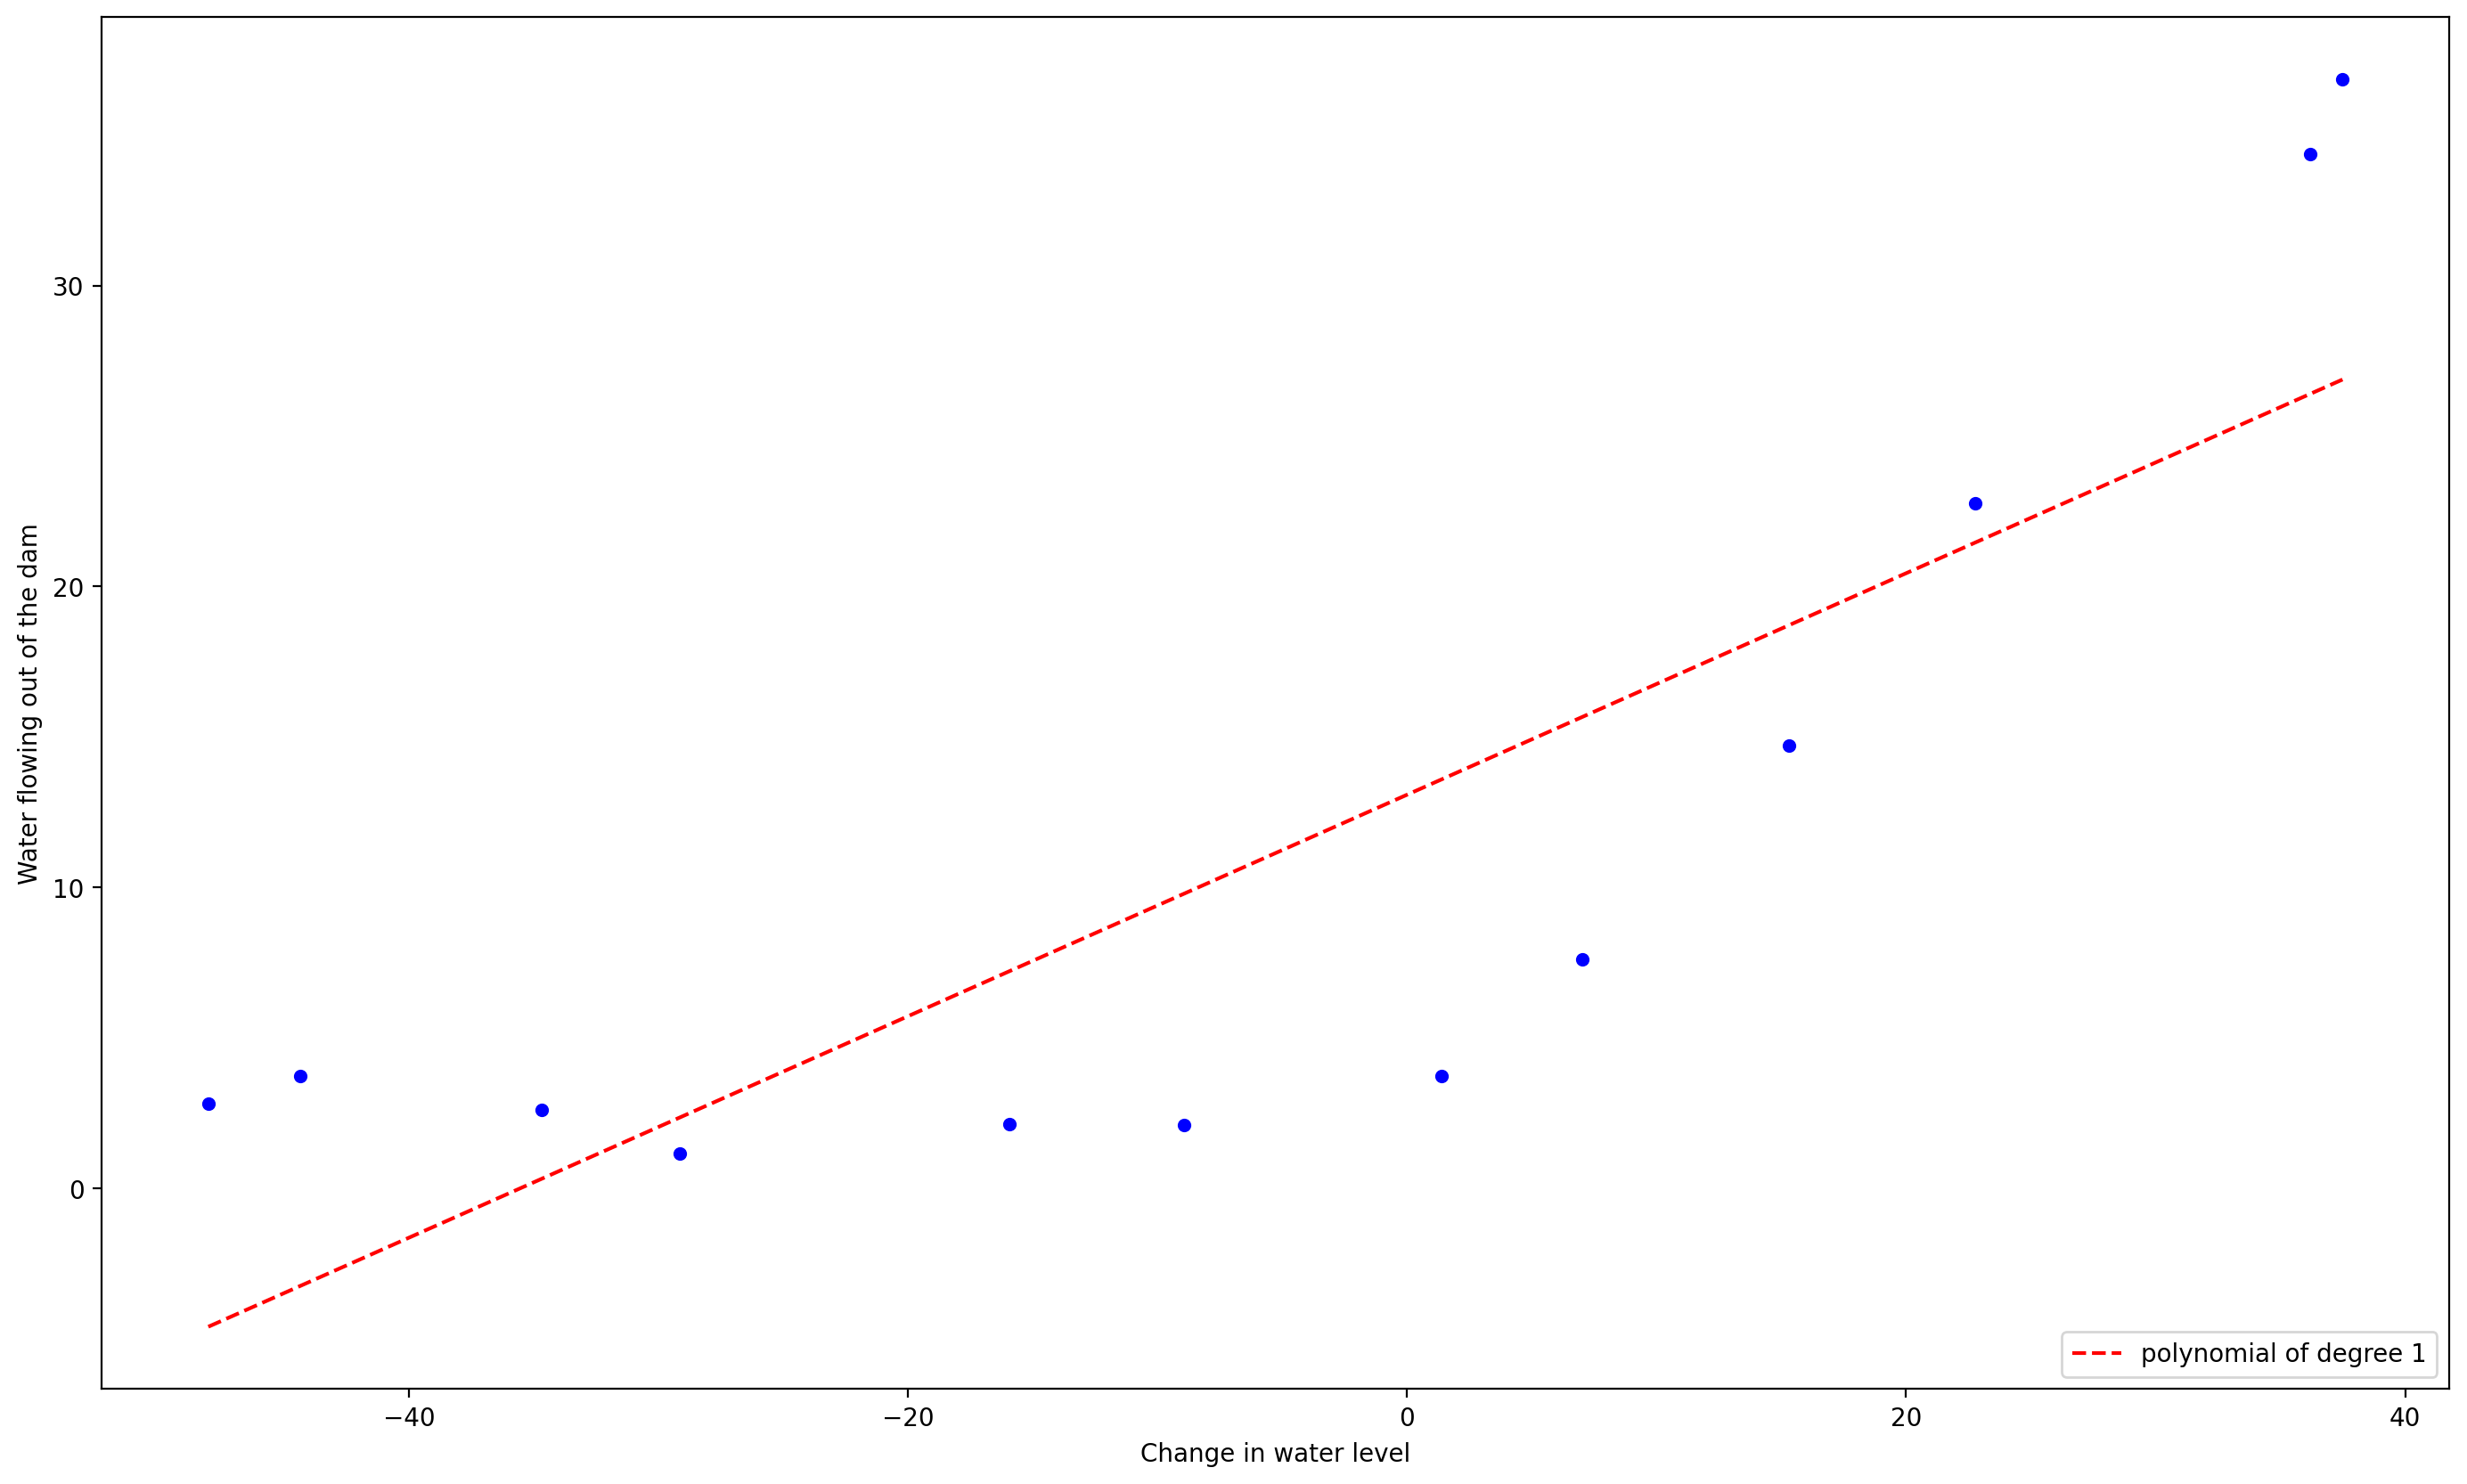

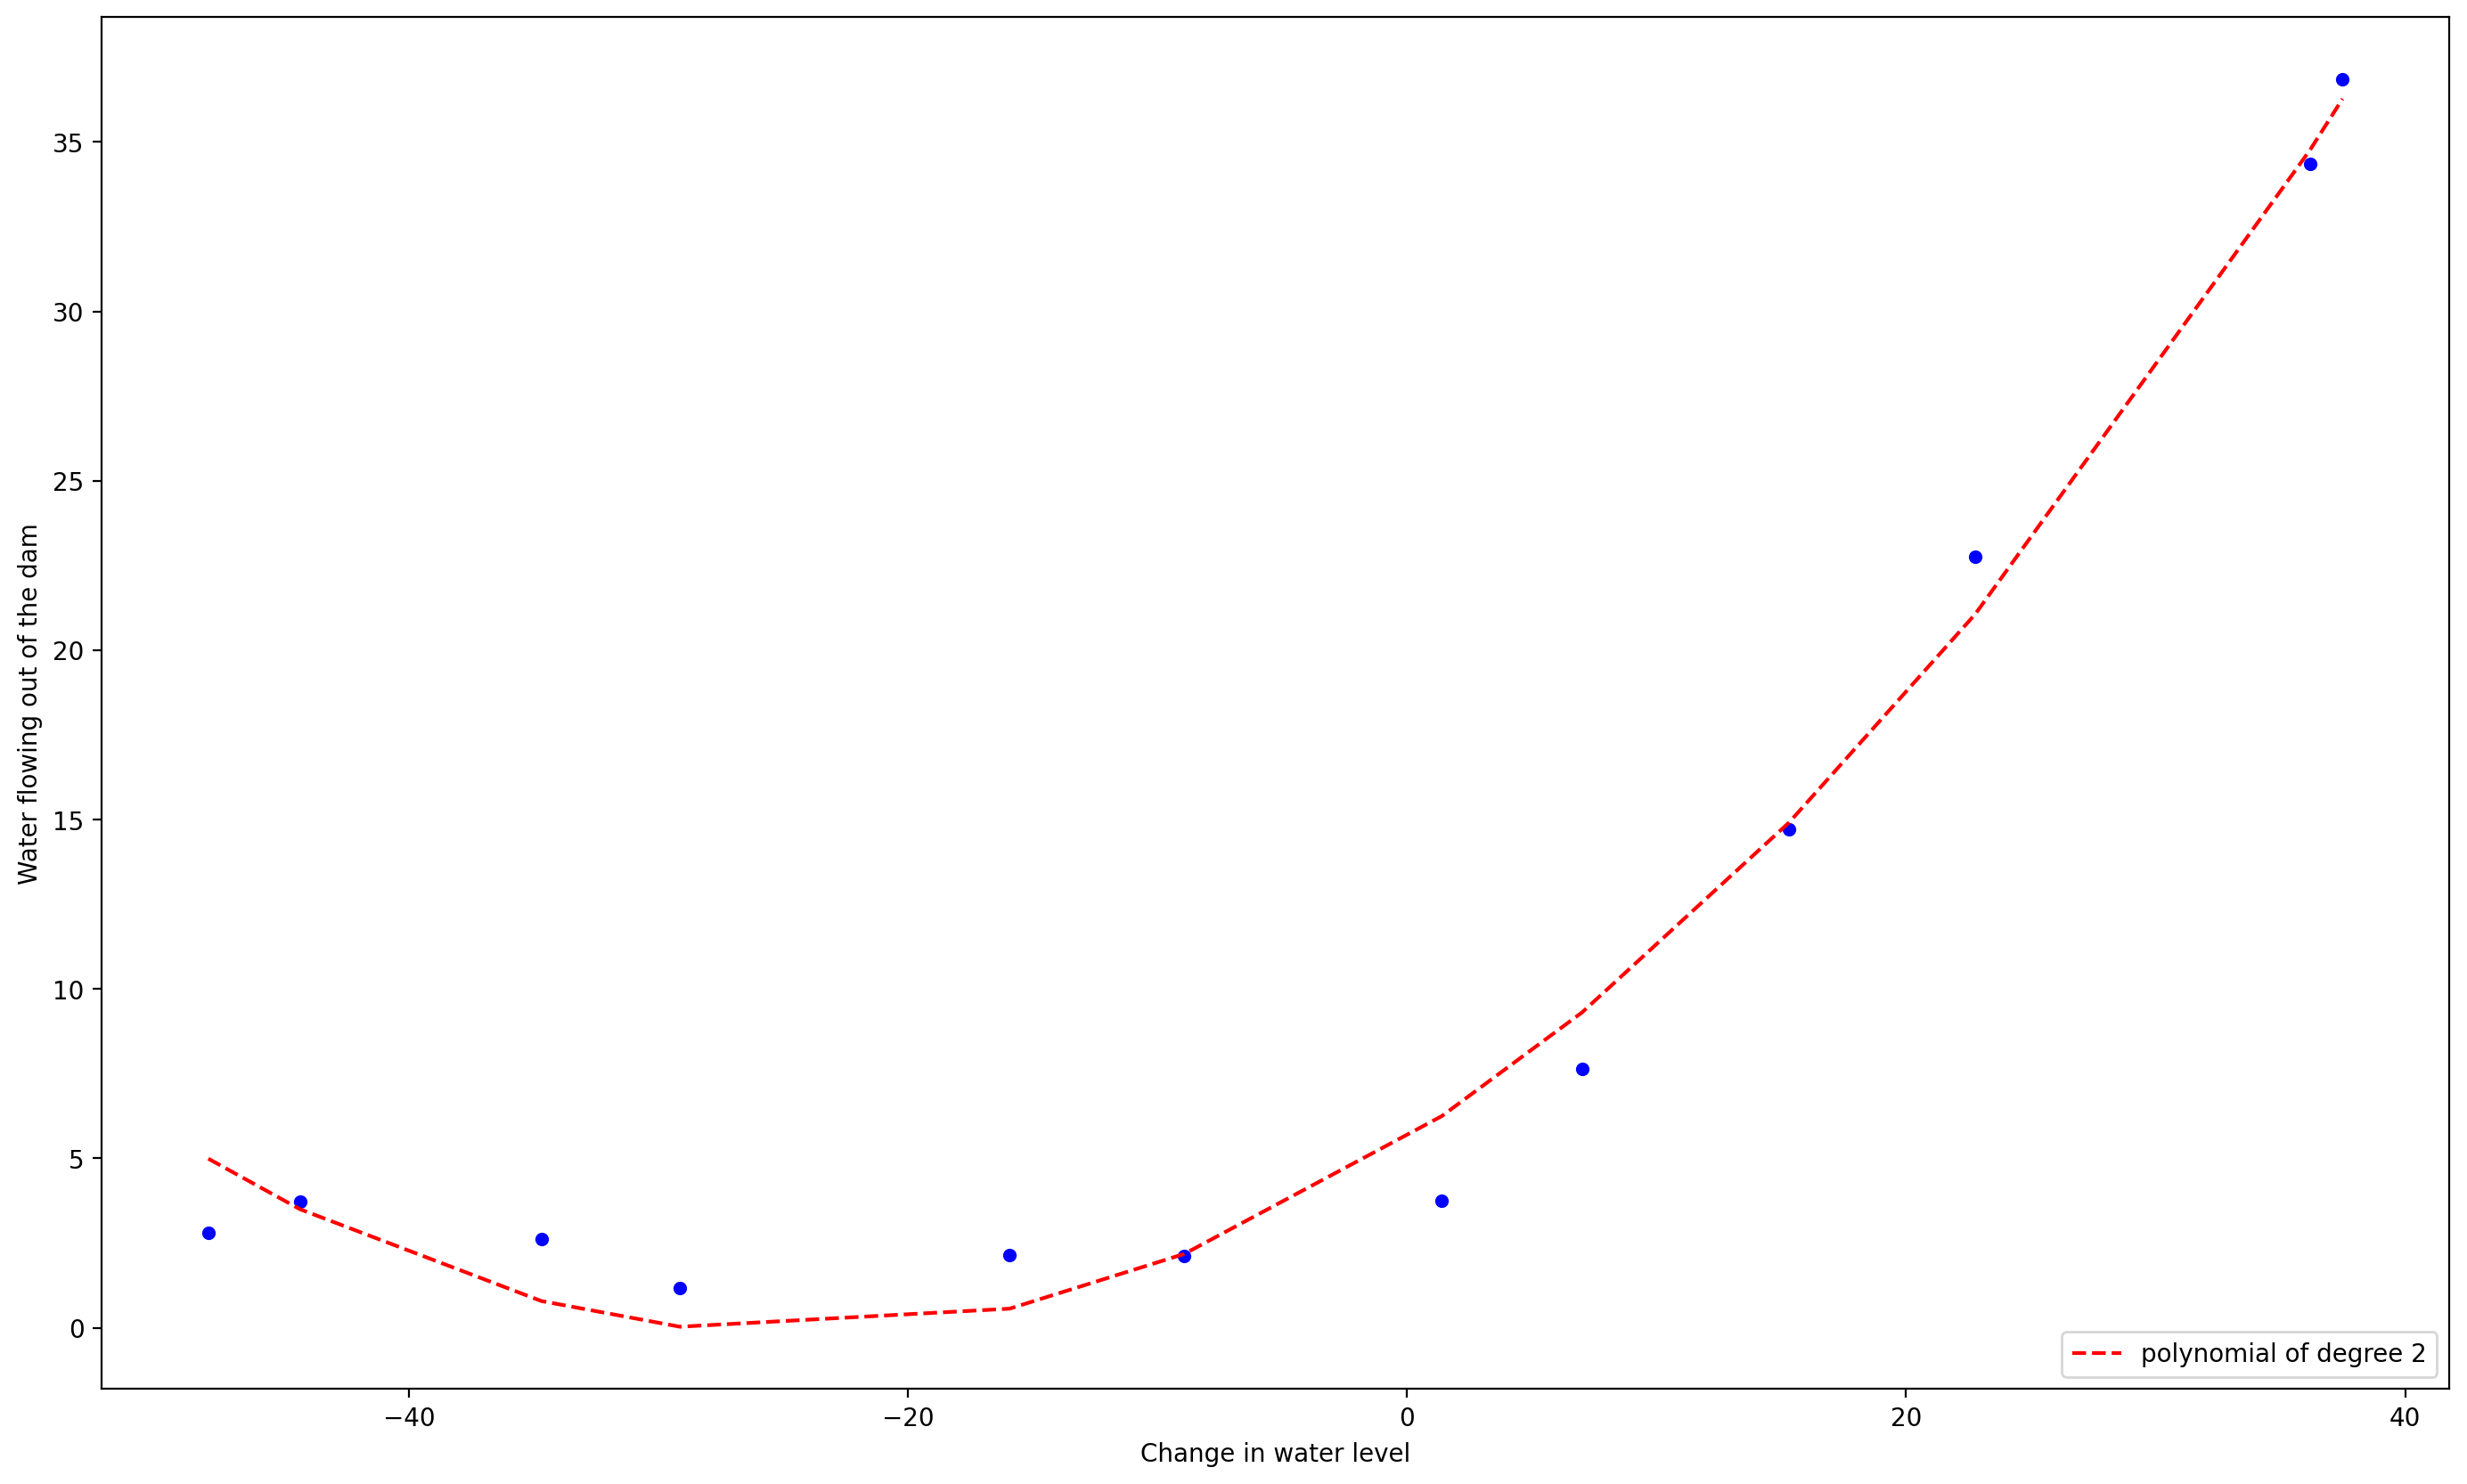

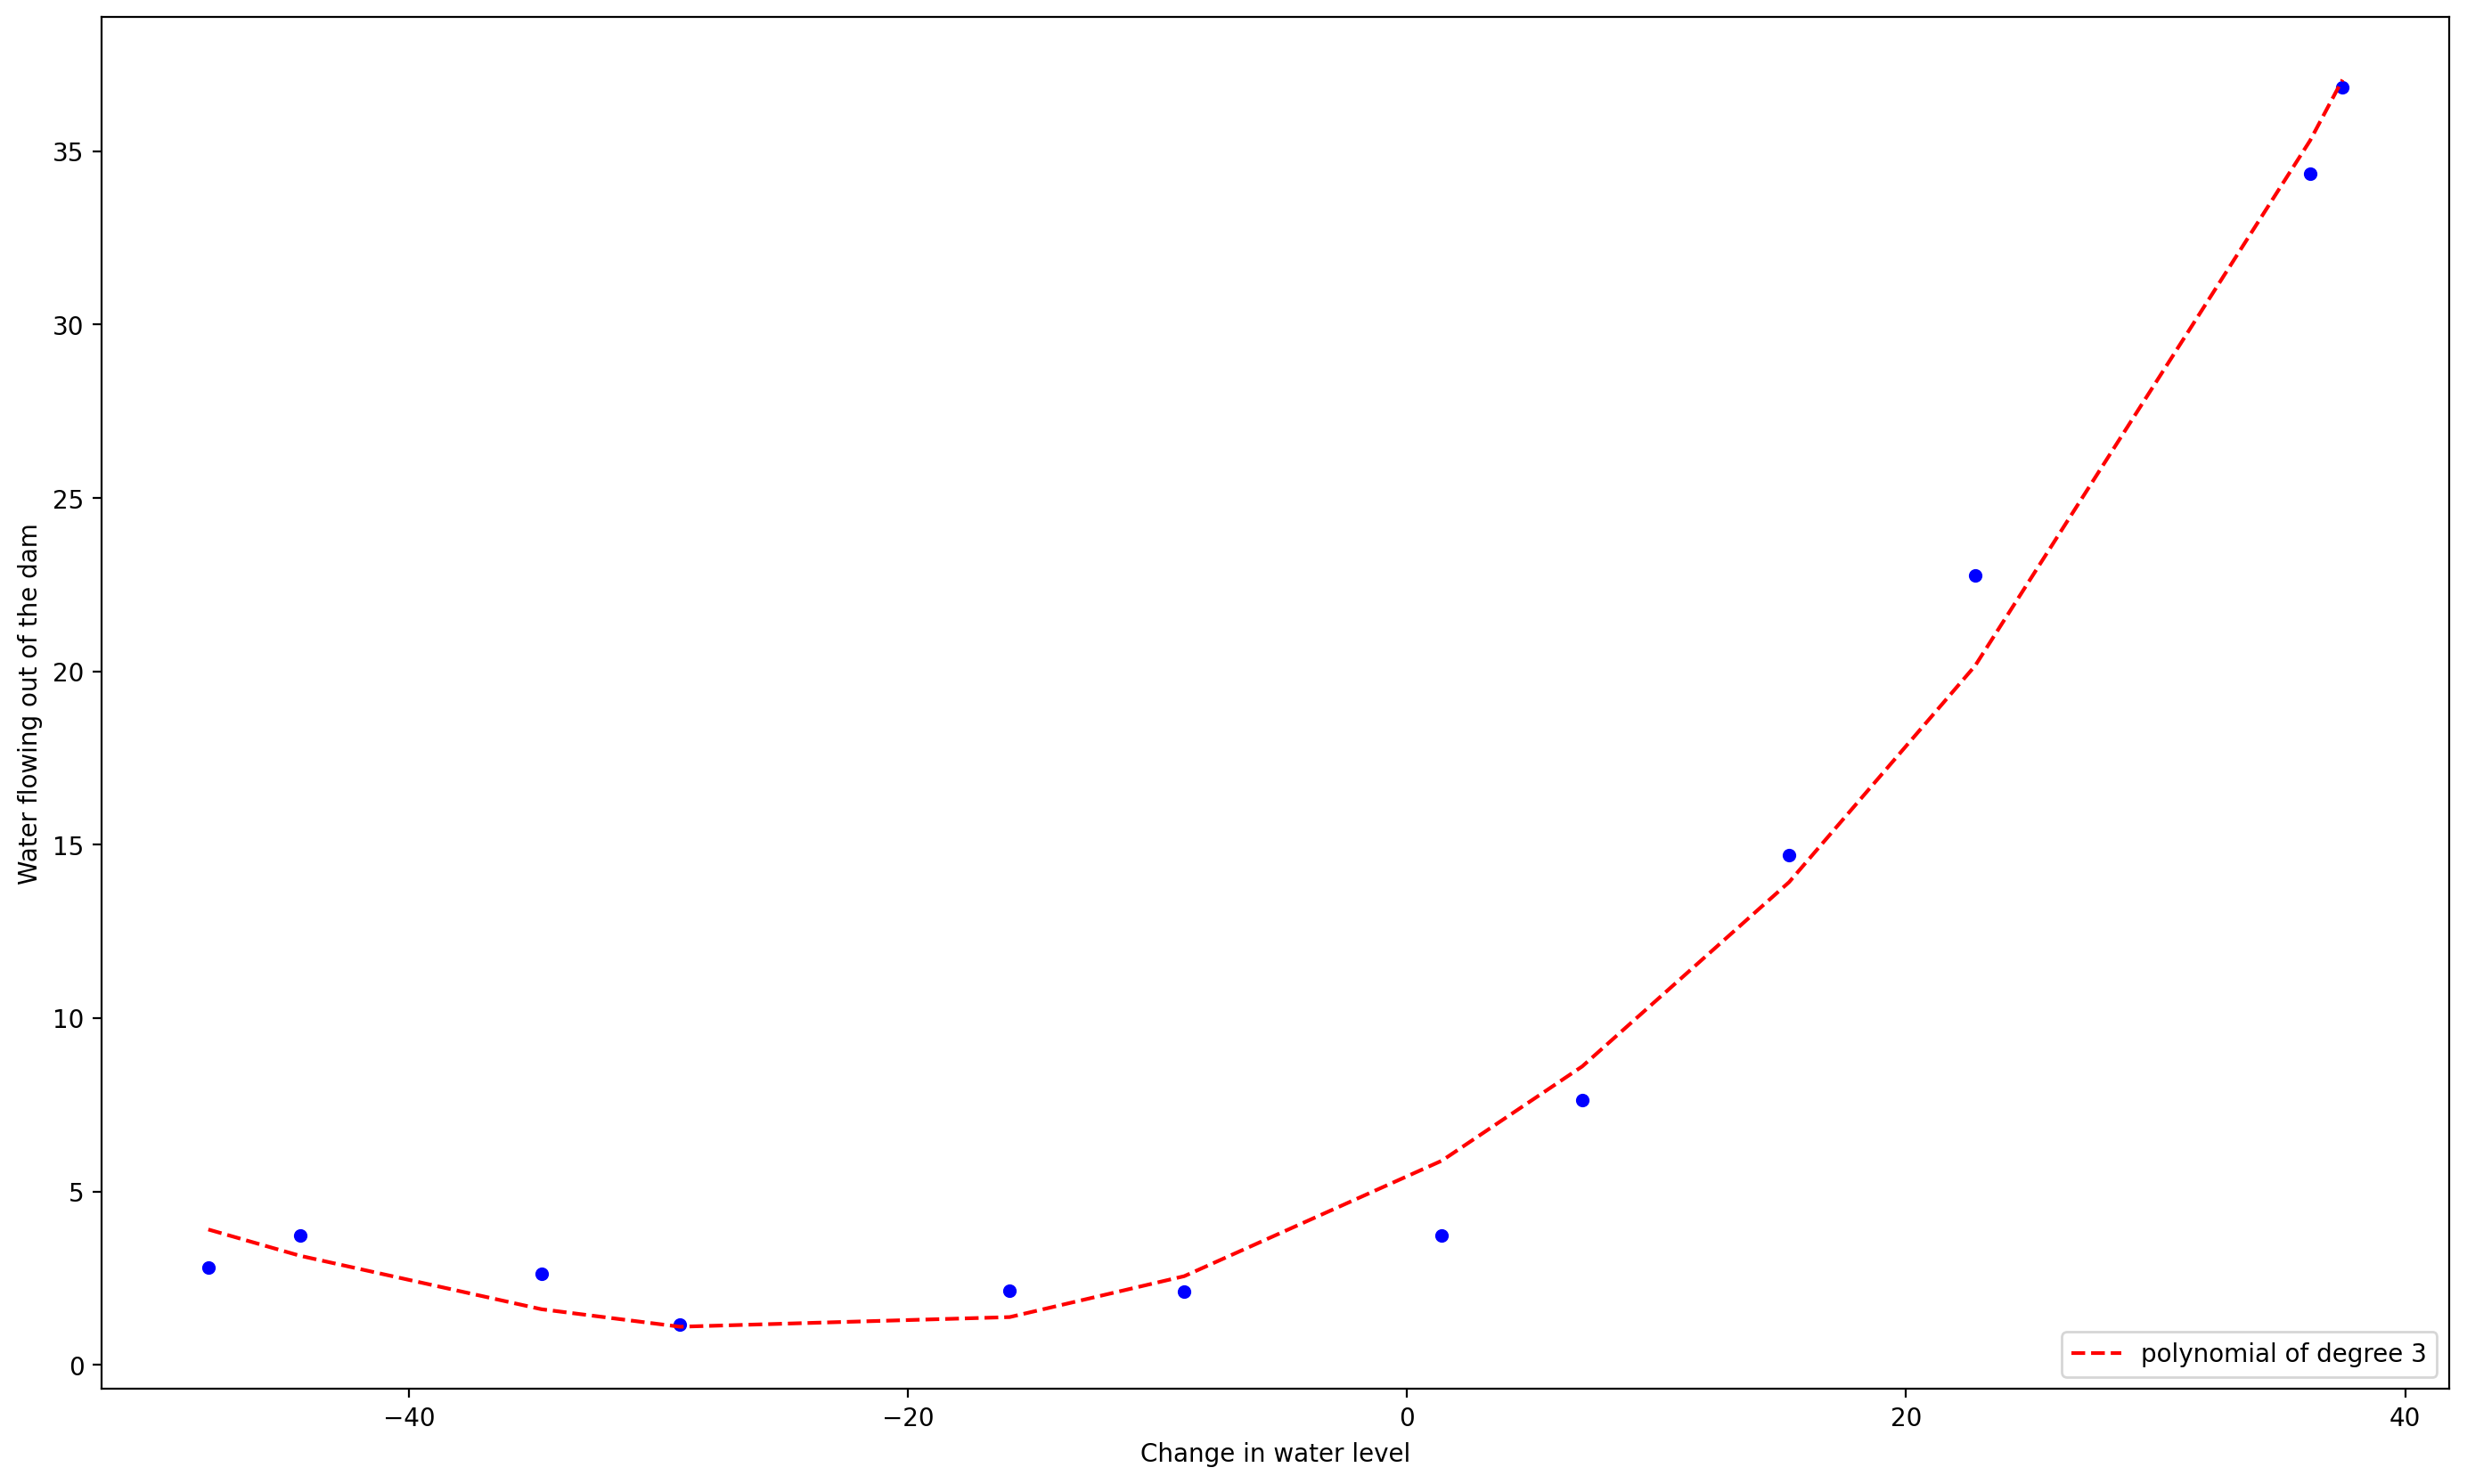

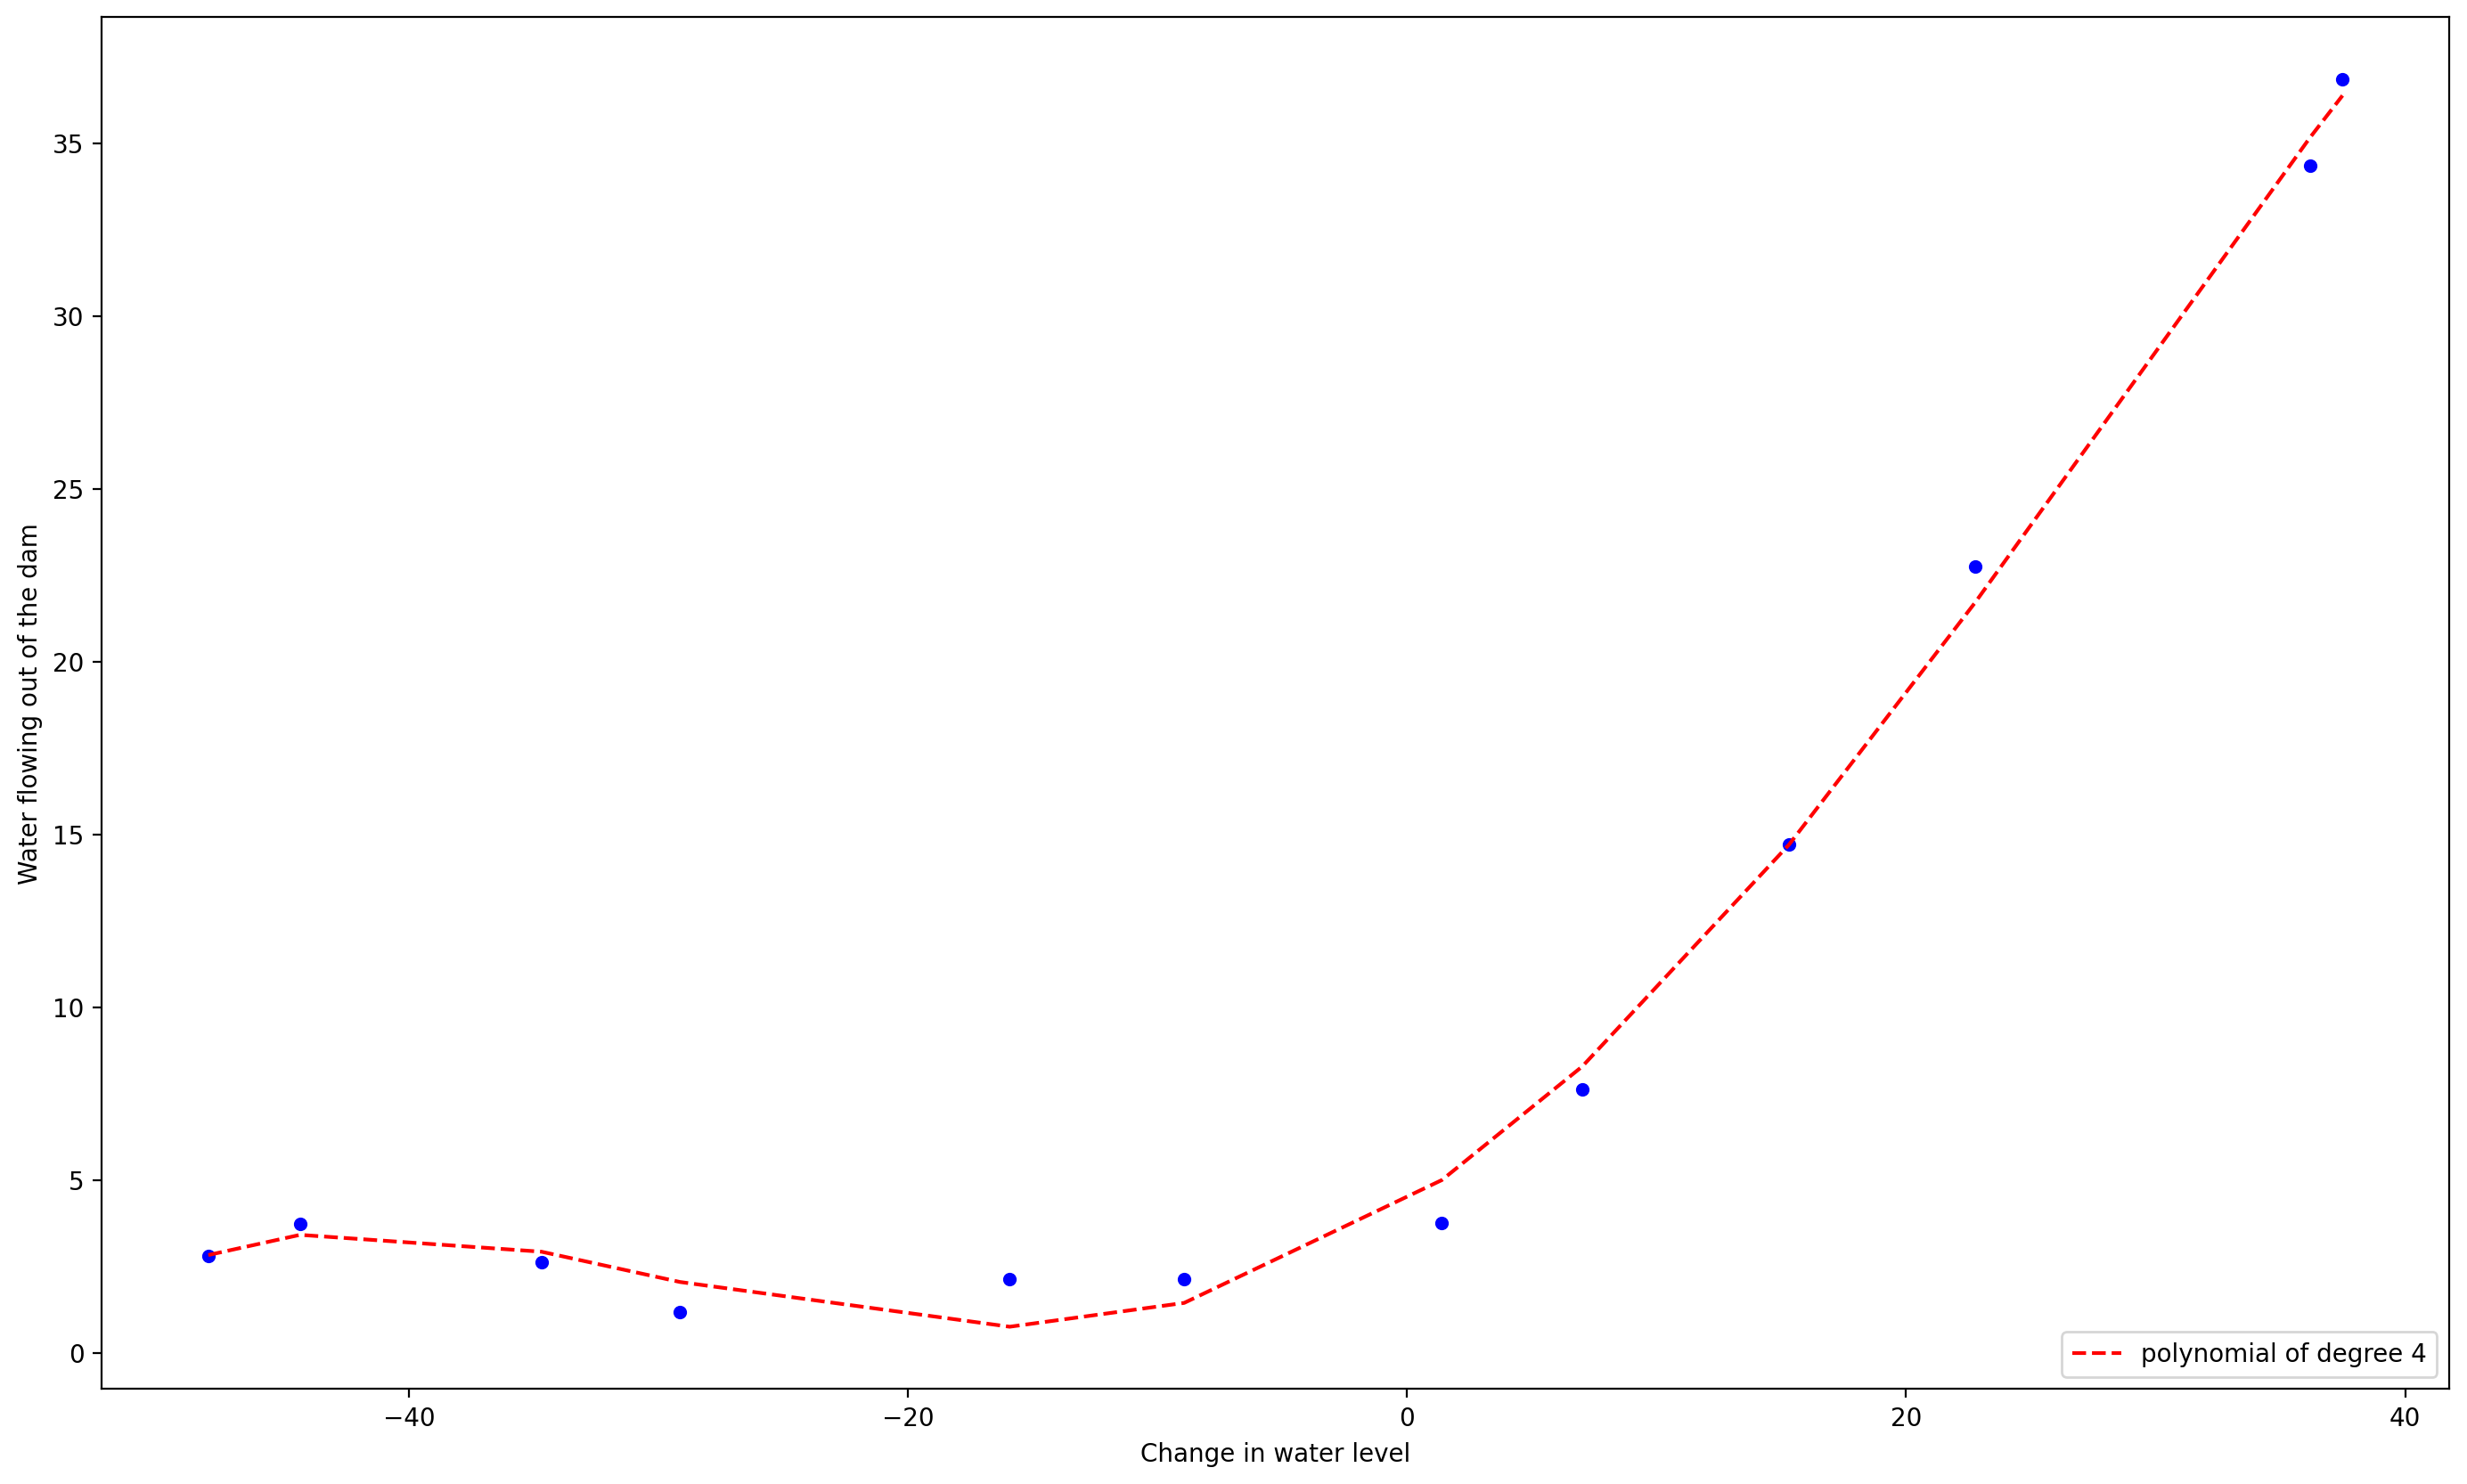

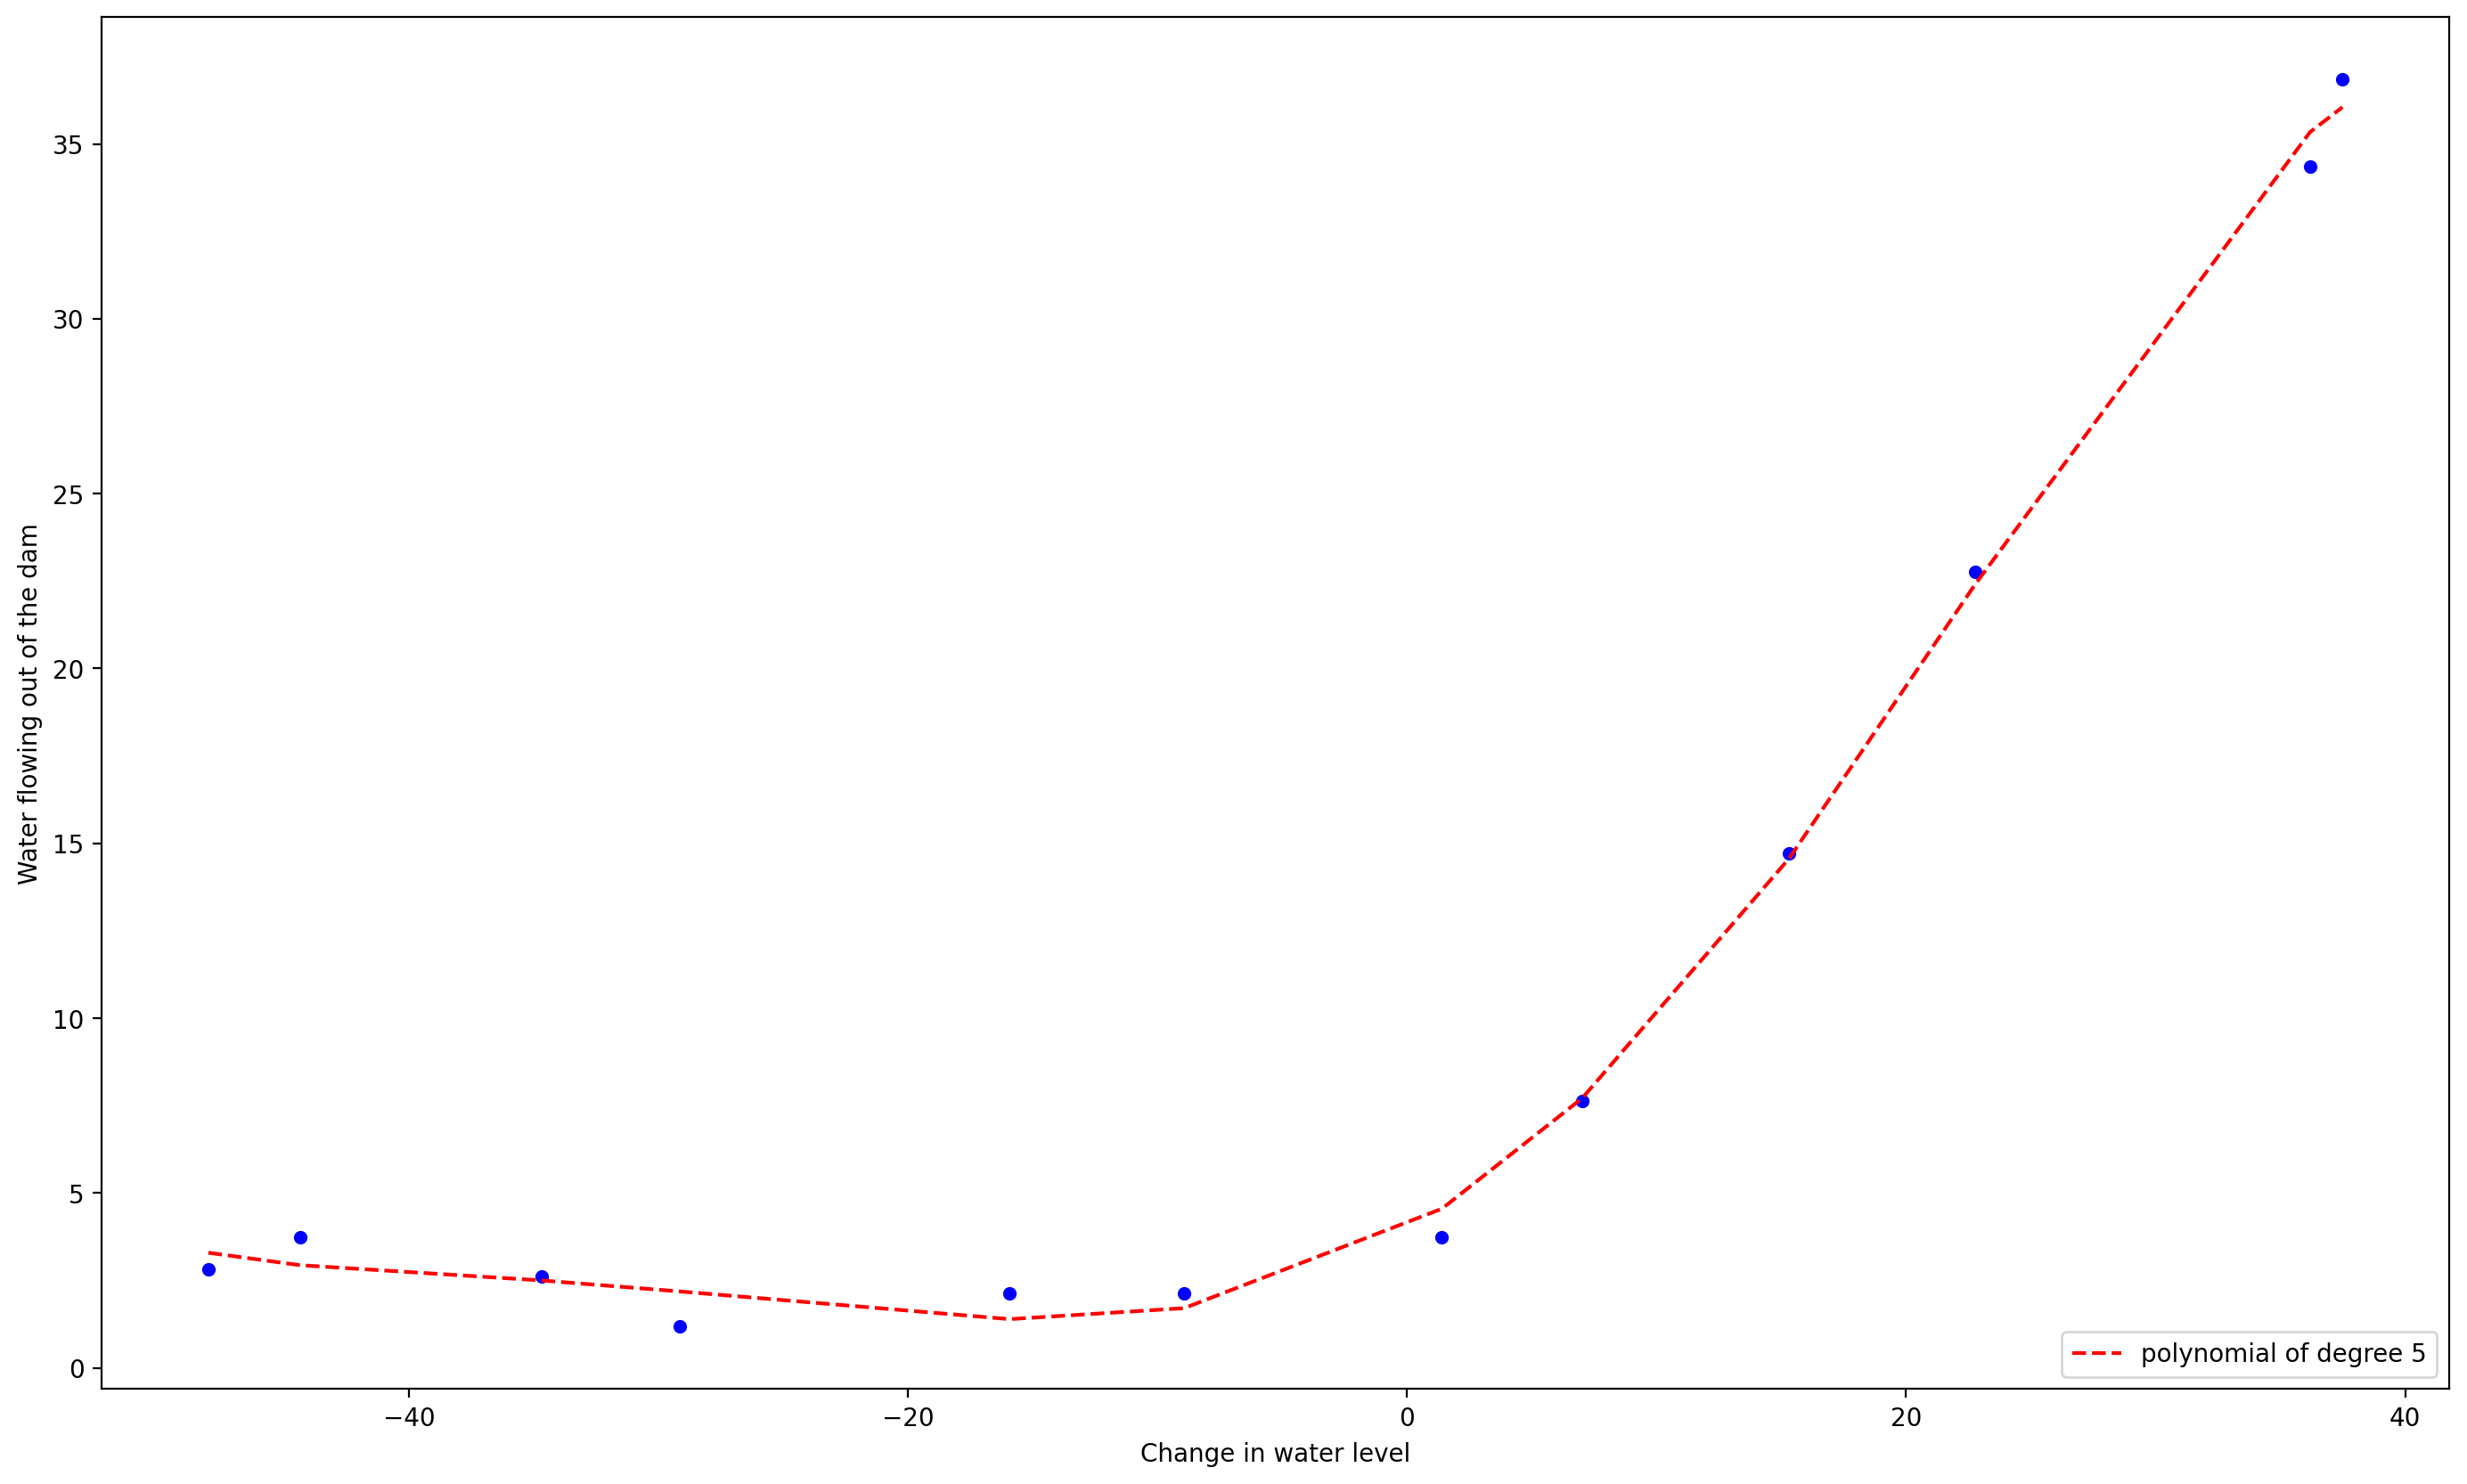

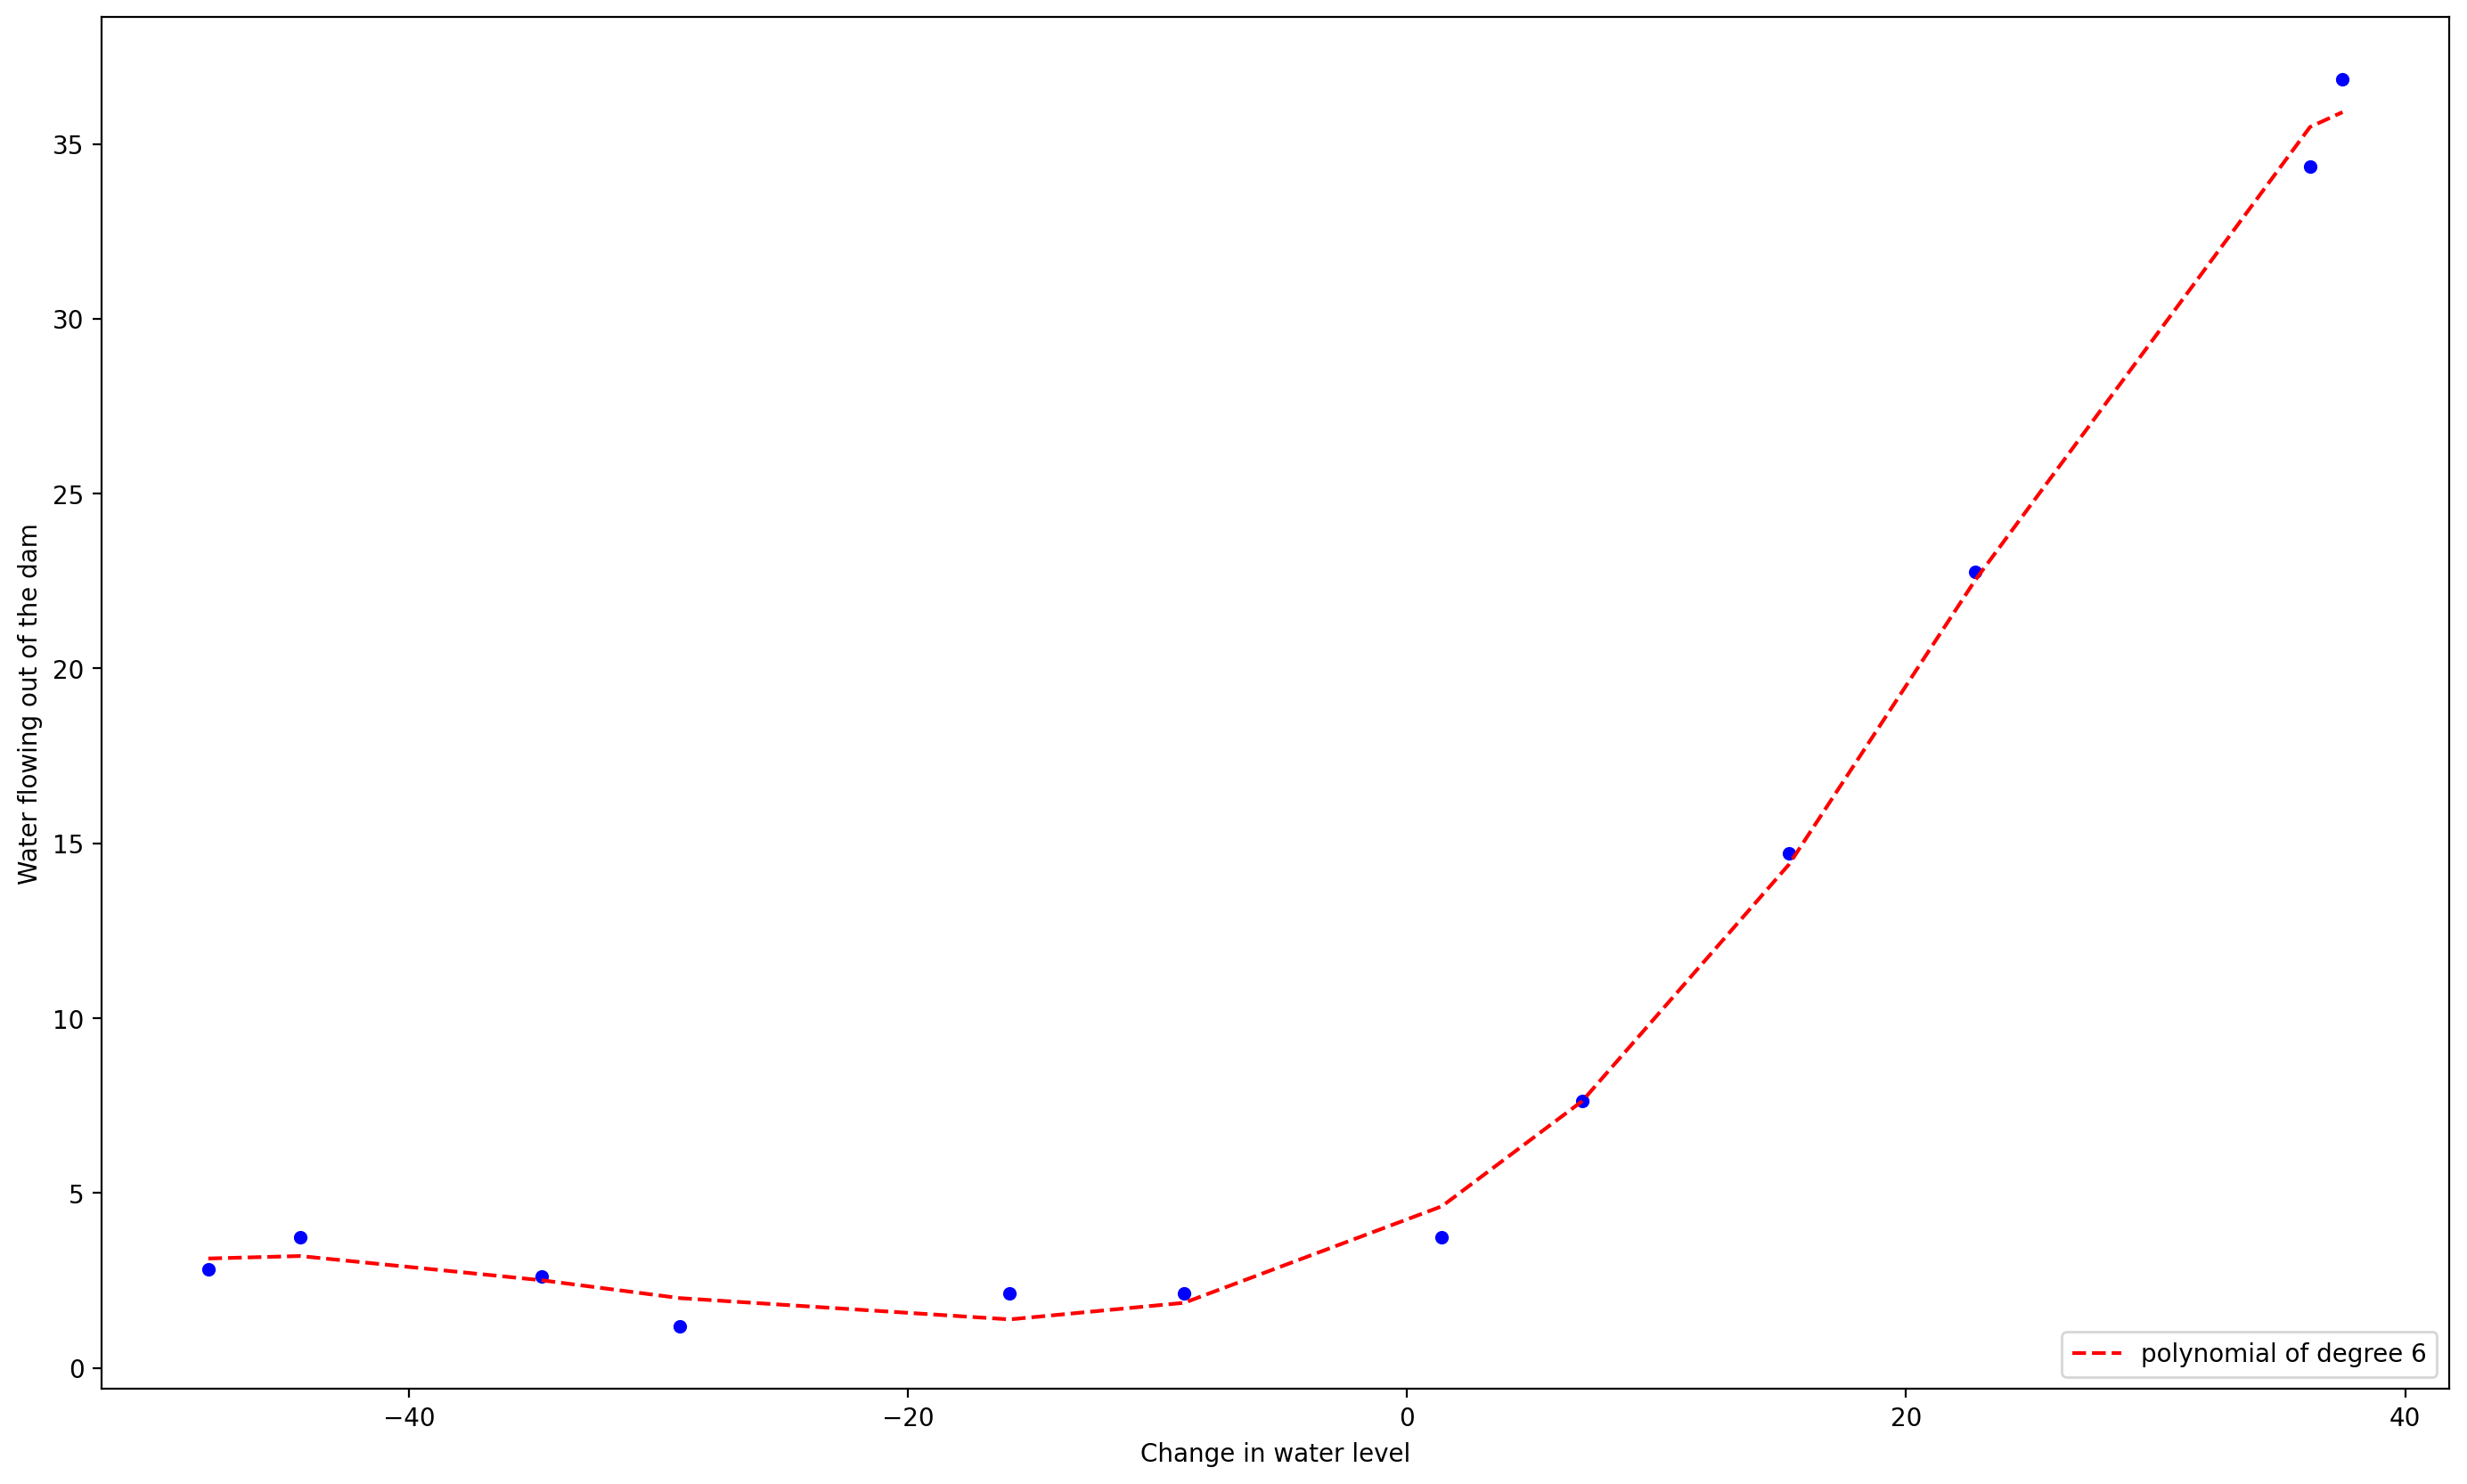

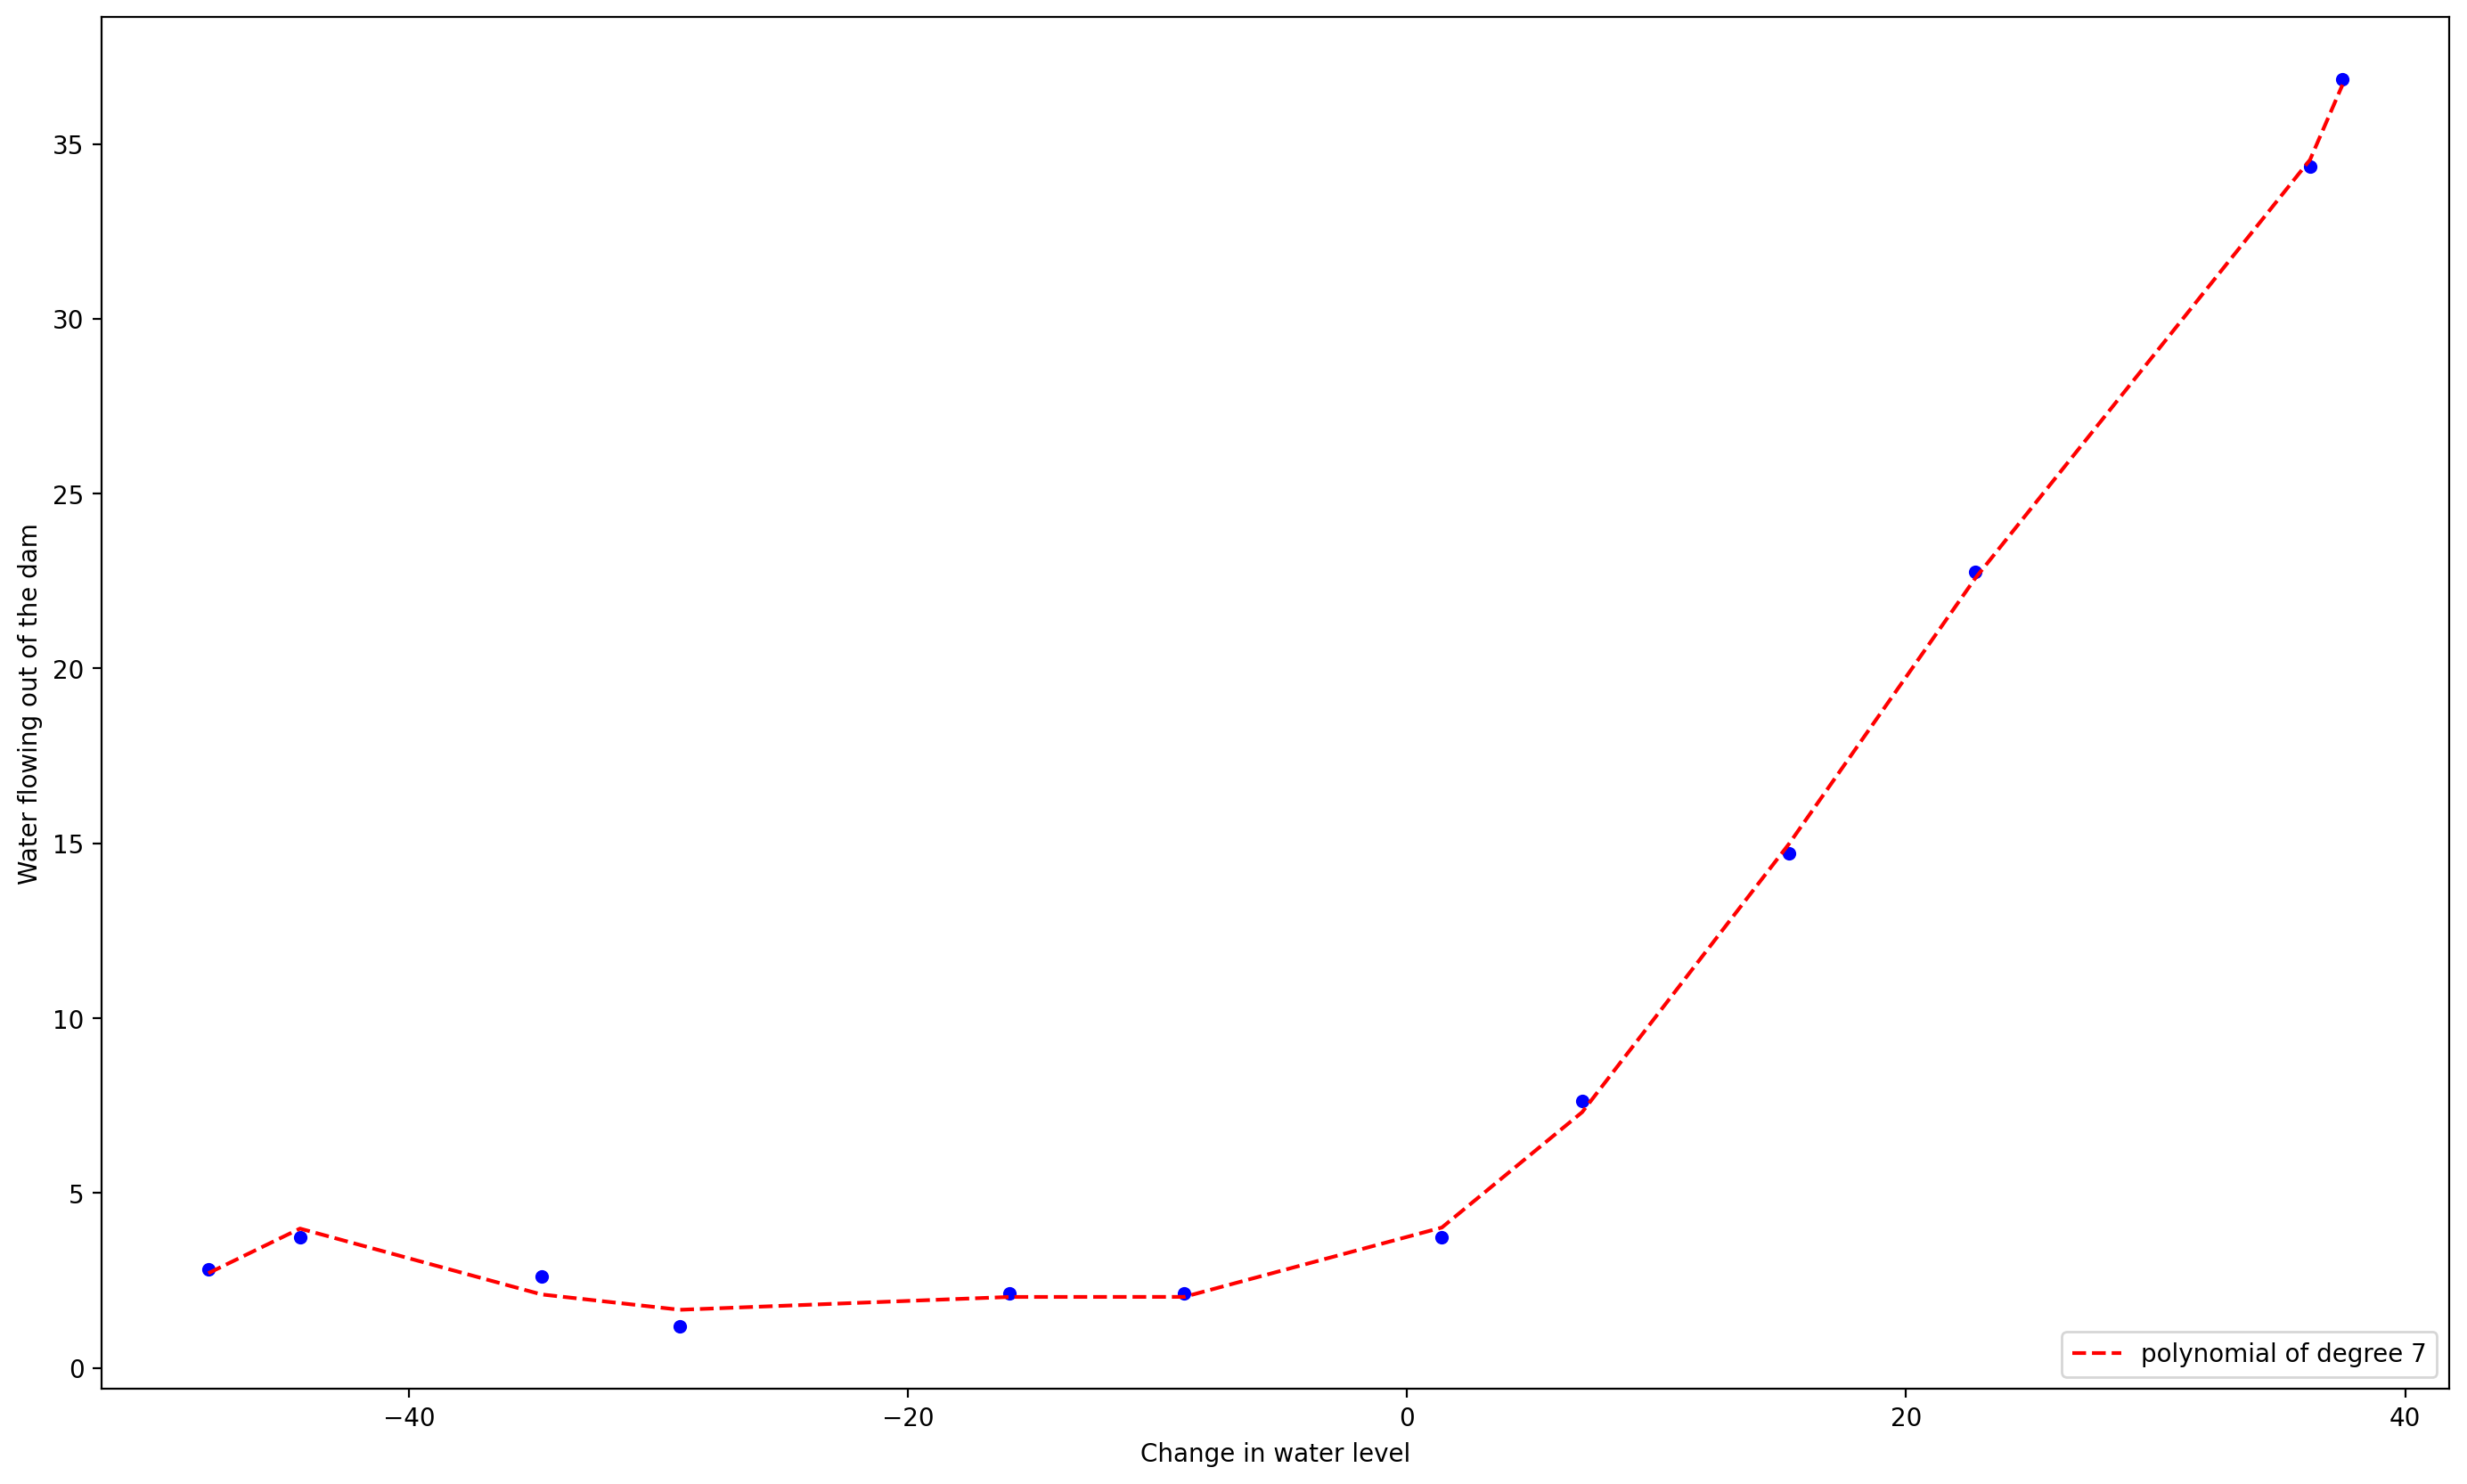

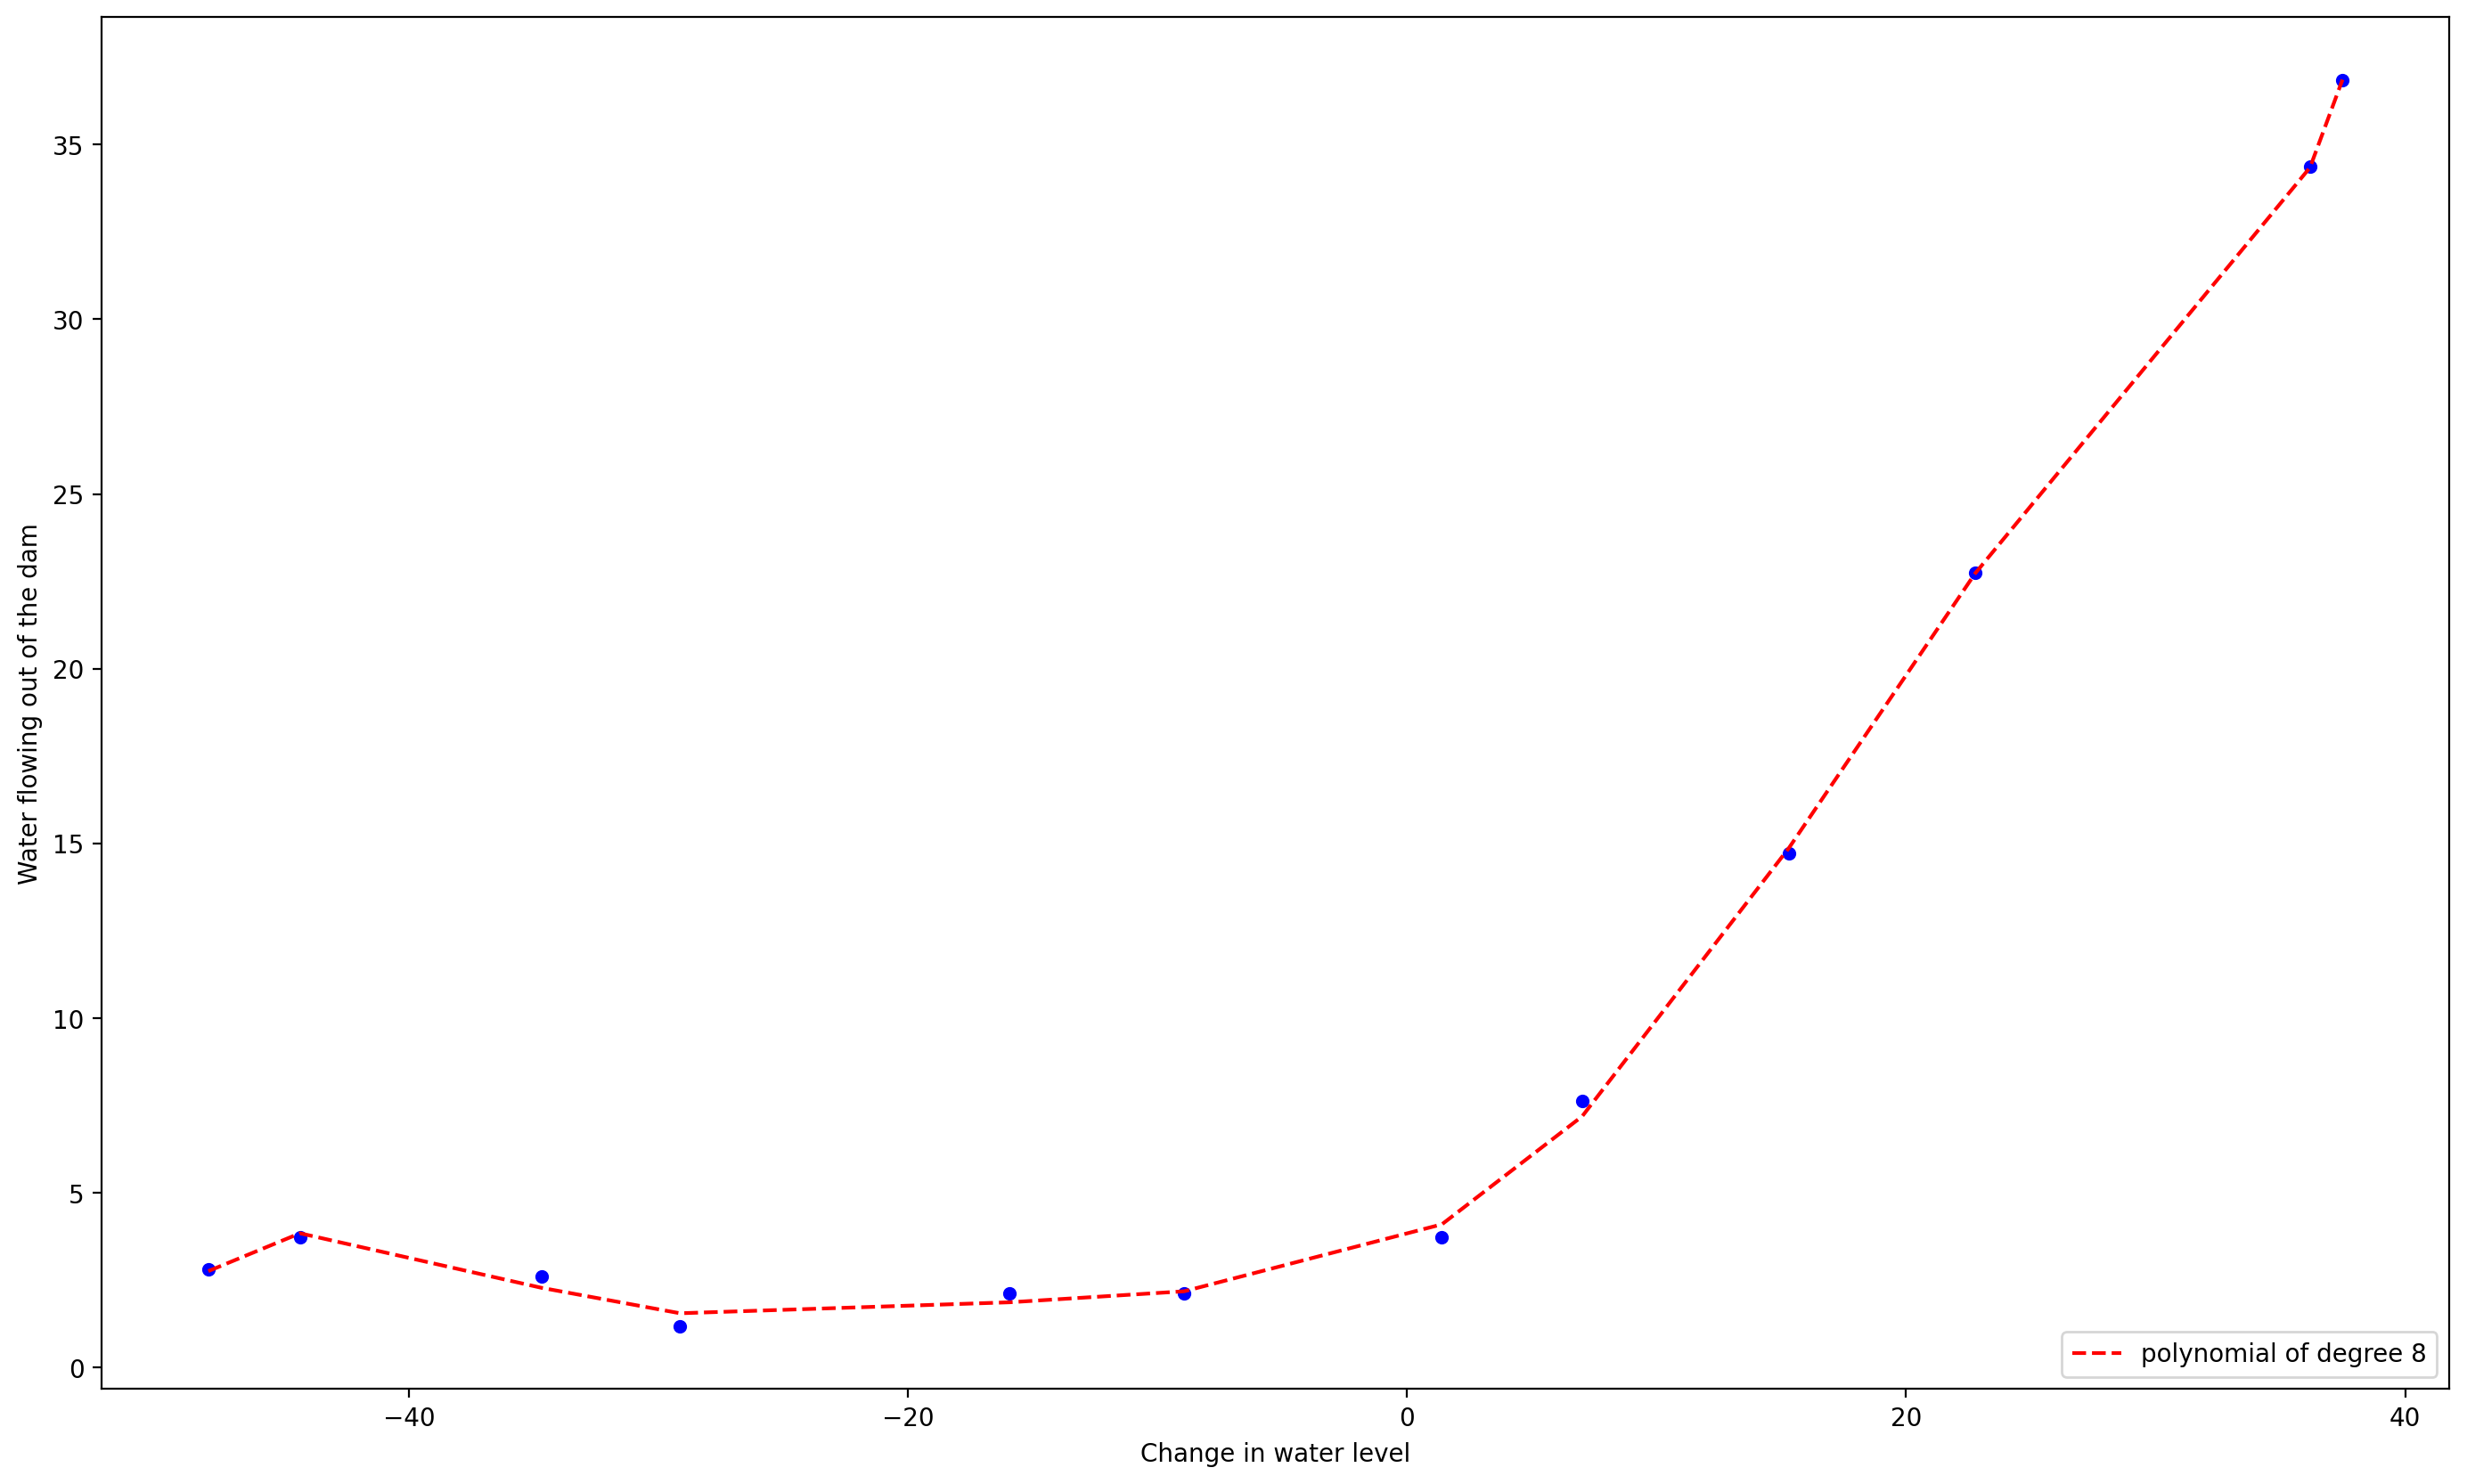

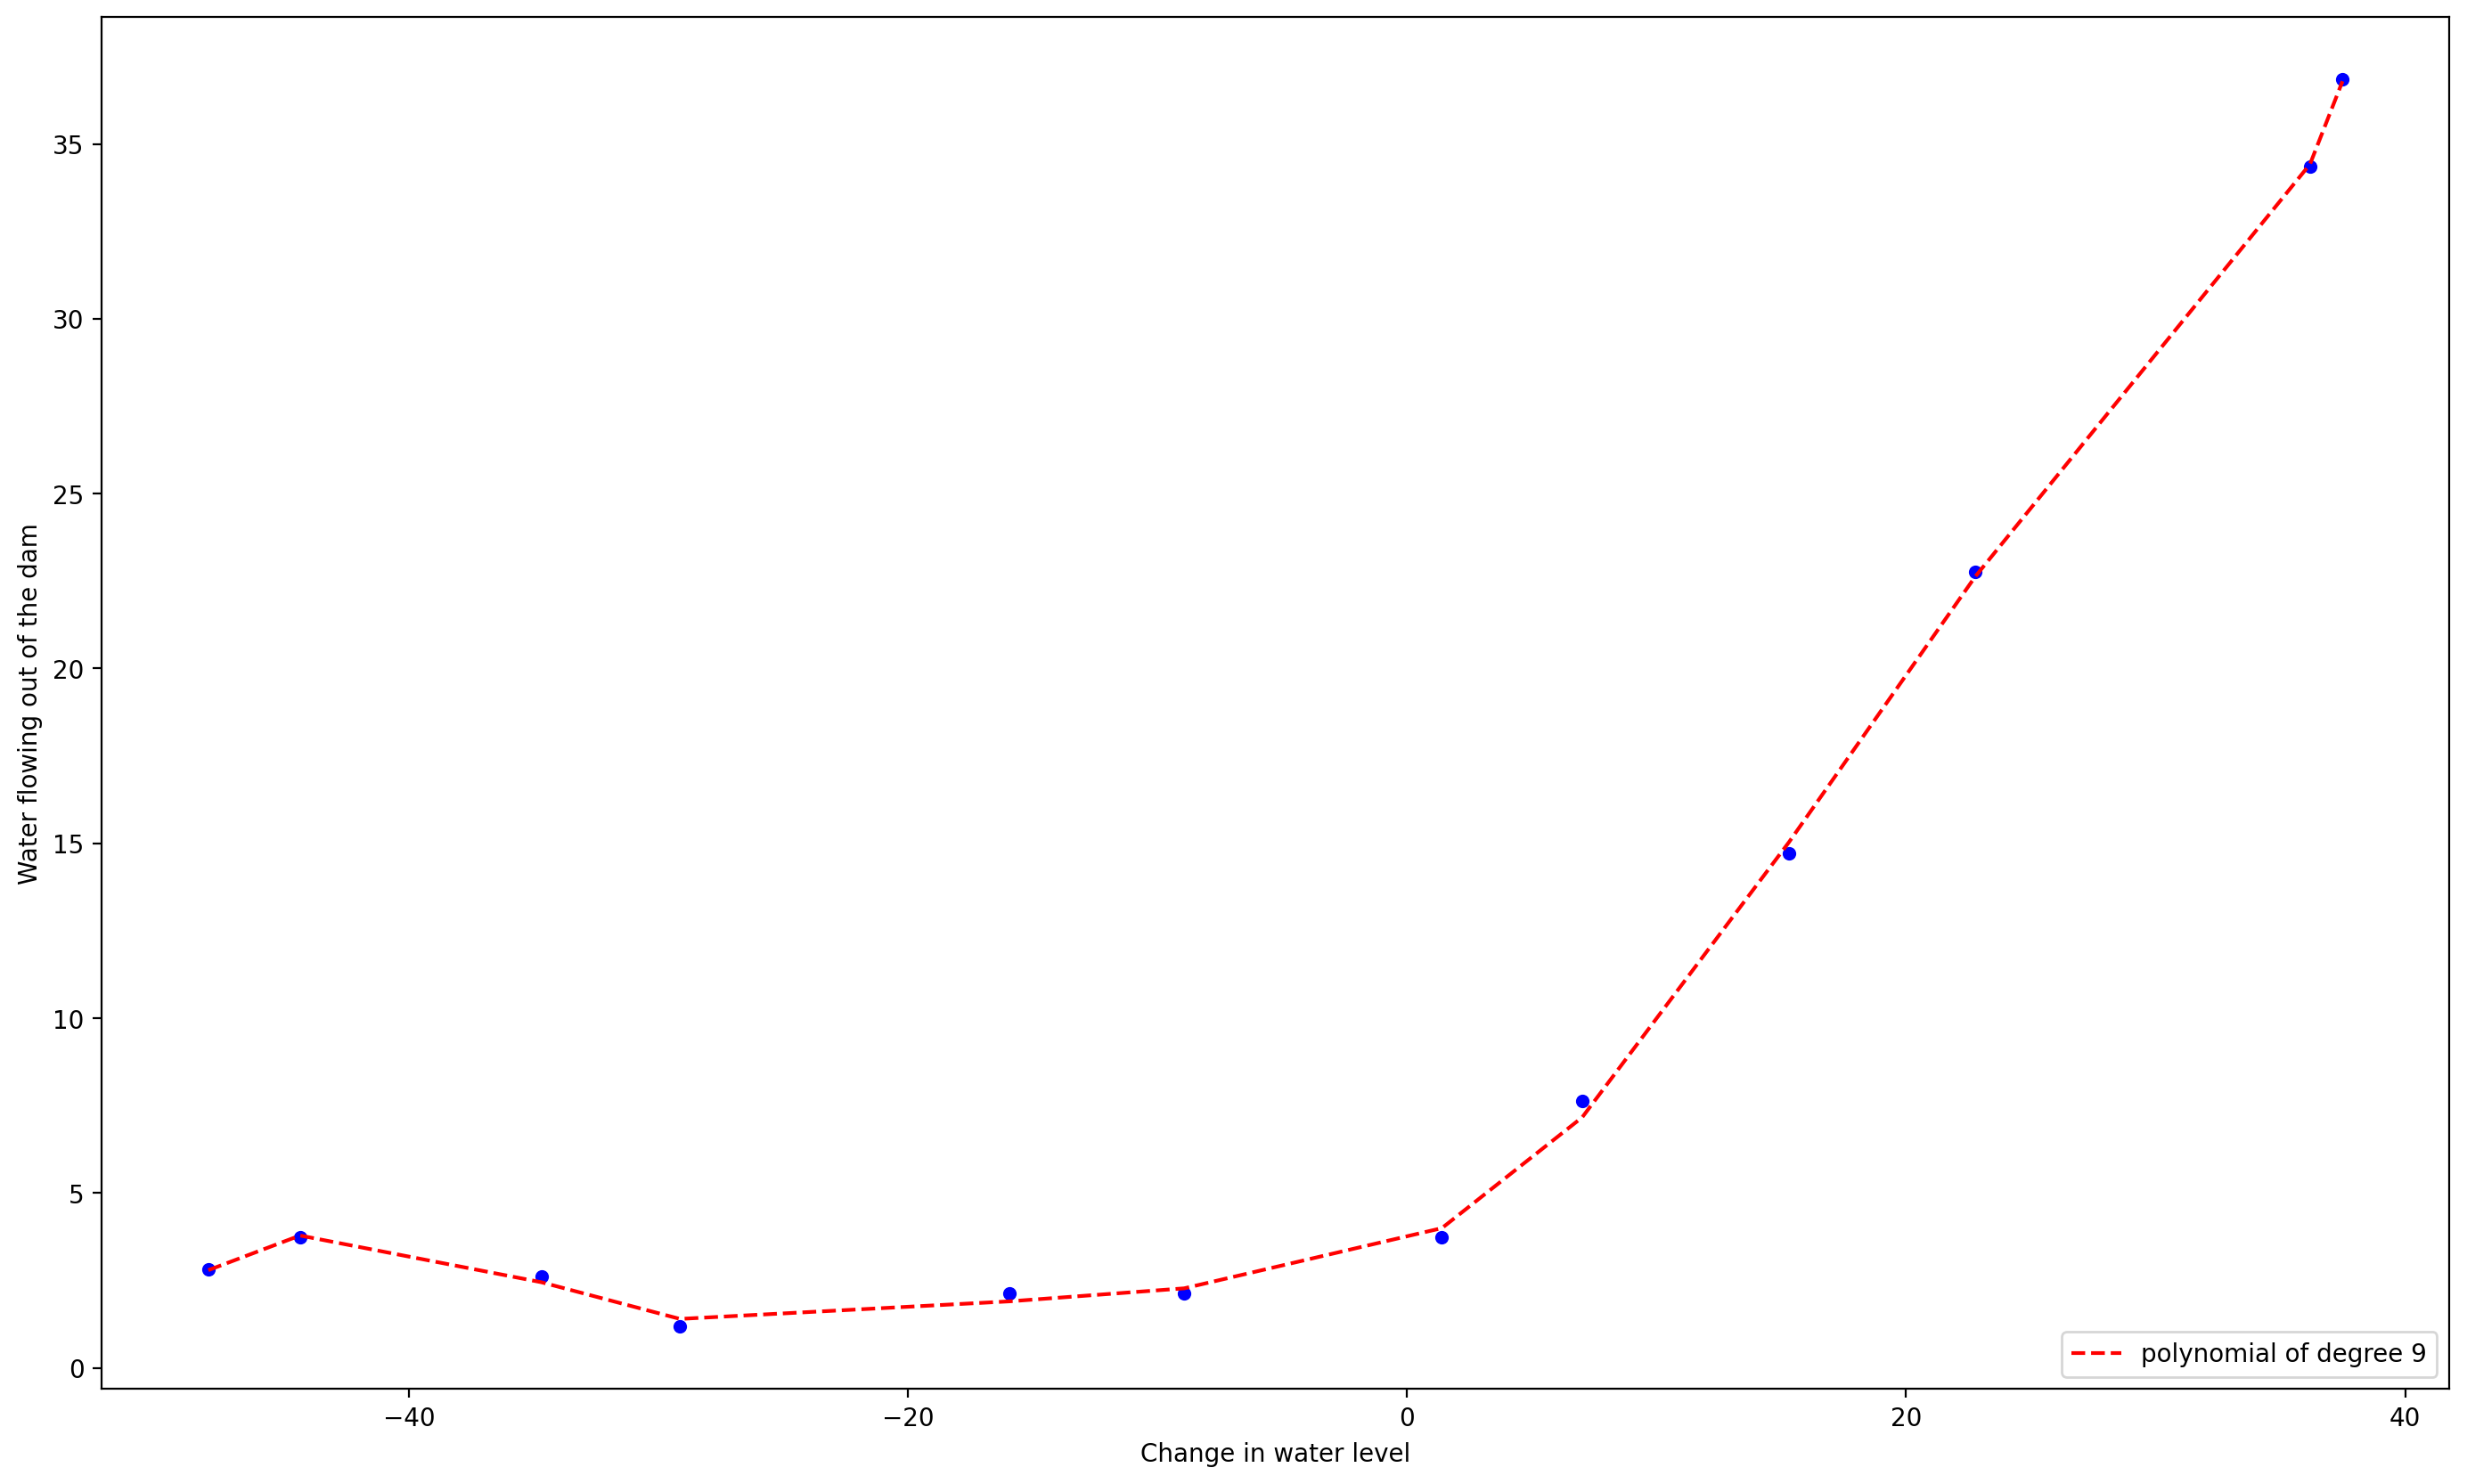

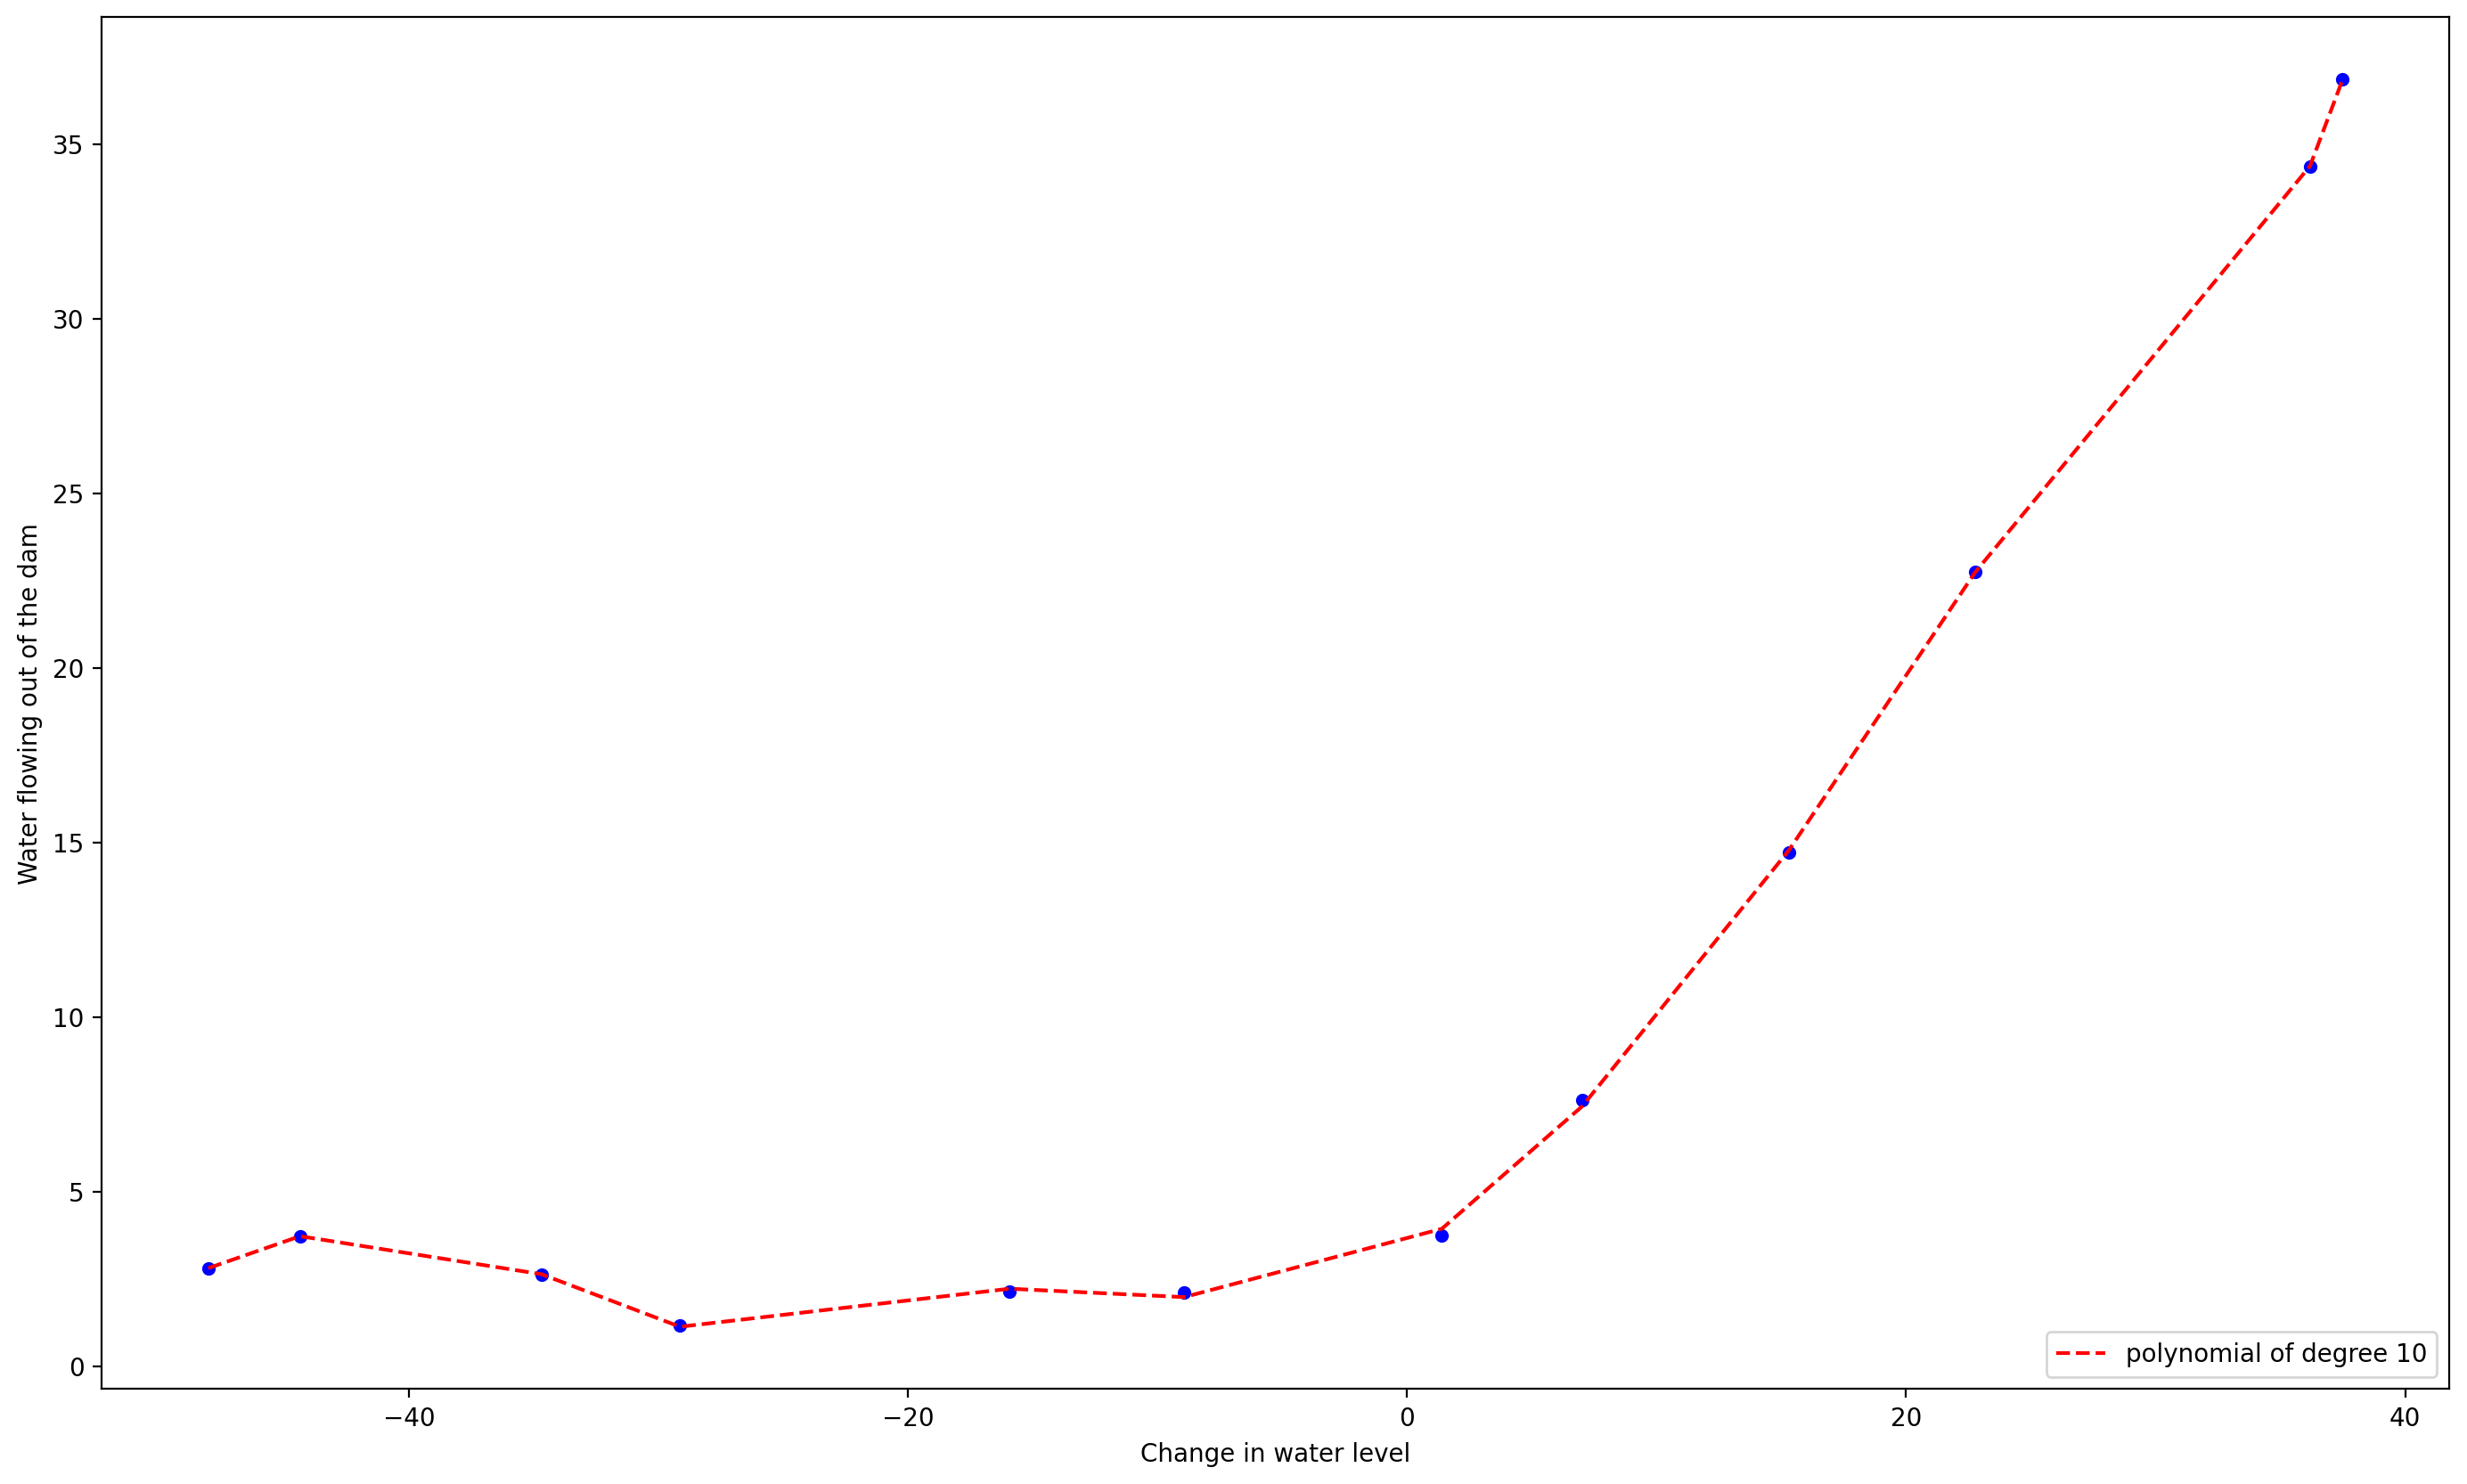

In [23]:
plot_poly(x, y, xlabel, ylabel)

How do we determine which one is the best fit?

Before digging into the previous question, let's make the following observation.

We have seen how the hypothesis function for a polynomial fit has the following structure.

$$h_\beta(x) = p(x) = \sum_k \beta_k x^k\, .$$

As said above, by the substitution $x_{k} = x^k$ the feature matrix $X$ can be written as follows.

$$ X = \begin{pmatrix} 1      & (x^{(1)})^1 & (x^{(1)})^2 & \ldots & (x^{(1)})^m \\
                       1      & (x^{(2)})^1 & (x^{(2)})^2 & \ldots & (x^{(2)})^m \\
                       \ldots & \ldots    & \ldots    & \ldots & \dots     \\ 
                       1      & (x^{(n)})^1 & (x^{(n)})^2 & \ldots & (x^{(n)})^m \end{pmatrix} \, .$$

__Quick exercise__: Write down the code to store the matrix $X$ of the dataset previously loaded, ready to be fed to a polynomial regression of degree $3$.

In [24]:
x = np.array(x)

# complete
X = None


We can now use `sklearn.linear_model.LinearRegression` to predict the value of the flow, if the observed water level is `level_test = 25`.

In [25]:
level_test = 25
model = LinearRegression()
model.fit(X, y)

Xts = np.array([1, level_test, level_test**2, level_test**3]).reshape(1, -1)

prediction = model.predict(Xts)


print('Your predicted flow: %.10f' %prediction)

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

##### Polynomial features

Recently `sklearn` introduced a preprocessing object to perform the very same transformation we performed in numpy [`PolinomialFeatures`]().

This can be used as any other preprocessing object. It takes the polynomial rank as parameter and then it owns the method `fit_transform`.

In [ ]:
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(x.reshape(-1,1))
level_test_array = poly.fit_transform(np.array(level_test).reshape(1,-1))

In [ ]:
model.fit(X_, y);

In [ ]:
prediction = model.predict(level_test_array)


print('Your predicted flow: %.10f' %prediction)

Your predicted flow: 22.3186877411


#### Exercise

Consider the [🍫 diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) it contains data with $10$ features and a target value representing a quantitative measure of disease progression one year after baseline. Find the _best_ polynomial fit based on the test score for this dataset.